Algerian Forest Fires 

Problem statement: To predict temperature based on different features.

Implementation by
1.Linear Regression
2.Ridge Regression
3.Lasso Regression
4.Elastic Net Regression

In [1]:
## importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# reading dataset
data1 = pd.read_csv("C:/Users/nawin/Downloads/Algerian_forest_fires_dataset_UPDATE.csv",header=1)

In [3]:
data1.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
## Removing unnecessary rows from datasets

data1.drop([122,123], inplace = True) 
data1.reset_index(inplace=True)
data1.drop('index',axis=1,inplace=True)

In [5]:
# Adding a new column "region" to dataset

data1.loc[:122,'region']= 'bejaia'
data1.loc[122:,'region']= 'Sidi-Bel Abbes'

In [6]:
data1.shape

(244, 15)

(244, 15)

In [7]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4    RH          244 non-null    object
 5    Ws          244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
 14  region       244 non-null    object
dtypes: object(15)
memory usage: 28.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  -----

In [8]:

data1.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'region'],
      dtype='object')

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'region'],
      dtype='object')

In [9]:
#let's check for missing values
data1.isnull().sum()

# observatioon: one null value in classes

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
region         0
dtype: int64

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
region         0
dtype: int64

In [10]:
data1.columns =[i.strip() for i in data1.columns]
data1.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [11]:
## dropping the Feature,"Classes"
del data1['Classes']

In [12]:
data1.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,bejaia
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,bejaia
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,bejaia
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,bejaia
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,bejaia


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,bejaia
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,bejaia
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,bejaia
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,bejaia
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,bejaia


In [13]:
## Adding new column 'Date' by replacing day, month, year
data1['Date'] =pd.to_datetime(data1[['day','month','year']])
data1.drop(['day','month','year'], axis=1, inplace=True)

In [14]:
data1.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region,Date
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,bejaia,2012-06-01
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,bejaia,2012-06-02
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,bejaia,2012-06-03
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,bejaia,2012-06-04
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,bejaia,2012-06-05


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region,Date
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,bejaia,2012-06-01
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,bejaia,2012-06-02
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,bejaia,2012-06-03
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,bejaia,2012-06-04
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,bejaia,2012-06-05


In [15]:
## Changing the datatypes of columns
data1['Temperature']=data1['Temperature'].astype(int)
data1['RH']=data1['RH'].astype(int)
data1['Ws']=data1['Ws'].astype(int)
data1['Rain']=data1['Rain'].astype(float)
data1['FFMC']=data1['FFMC'].astype(float)
data1['DMC']=data1['DMC'].astype(float)
data1['ISI']=data1['ISI'].astype(float)
data1['BUI']=data1['BUI'].astype(float)


In [16]:
data1.dtypes

Temperature             int32
RH                      int32
Ws                      int32
Rain                  float64
FFMC                  float64
DMC                   float64
DC                     object
ISI                   float64
BUI                   float64
FWI                    object
region                 object
Date           datetime64[ns]
dtype: object

Temperature             int32
RH                      int32
Ws                      int32
Rain                  float64
FFMC                  float64
DMC                   float64
DC                     object
ISI                   float64
BUI                   float64
FWI                    object
region                 object
Date           datetime64[ns]
dtype: object

In [17]:
## Label encoding in DC, FWI,region

from sklearn.preprocessing import LabelEncoder
LabelEncoder=LabelEncoder()
data1['DC']=LabelEncoder.fit_transform(data1['DC'])
data1['FWI']=LabelEncoder.fit_transform(data1['FWI'])
data1['region']=LabelEncoder.fit_transform(data1['region'])

In [18]:
data1.dtypes

Temperature             int32
RH                      int32
Ws                      int32
Rain                  float64
FFMC                  float64
DMC                   float64
DC                      int32
ISI                   float64
BUI                   float64
FWI                     int32
region                  int32
Date           datetime64[ns]
dtype: object

Temperature             int32
RH                      int32
Ws                      int32
Rain                  float64
FFMC                  float64
DMC                   float64
DC                      int32
ISI                   float64
BUI                   float64
FWI                     int32
region                  int32
Date           datetime64[ns]
dtype: object

In [19]:
## memory usage
data1.memory_usage()

Index           128
Temperature     976
RH              976
Ws              976
Rain           1952
FFMC           1952
DMC            1952
DC              976
ISI            1952
BUI            1952
FWI             976
region          976
Date           1952
dtype: int64

Index           128
Temperature     976
RH              976
Ws              976
Rain           1952
FFMC           1952
DMC            1952
DC              976
ISI            1952
BUI            1952
FWI             976
region          976
Date           1952
dtype: int64

In [20]:
## updated dataset
data1.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region,Date
0,29,57,18,0.0,65.7,3.4,150,1.3,3.4,5,1,2012-06-01
1,29,61,13,1.3,64.4,4.1,150,1.0,3.9,4,1,2012-06-02
2,26,82,22,13.1,47.1,2.5,146,0.3,2.7,1,1,2012-06-03
3,25,89,13,2.5,28.6,1.3,136,0.0,1.7,0,1,2012-06-04
4,27,77,16,0.0,64.8,3.0,18,1.2,3.9,5,1,2012-06-05


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region,Date
0,29,57,18,0.0,65.7,3.4,150,1.3,3.4,5,1,2012-06-01
1,29,61,13,1.3,64.4,4.1,150,1.0,3.9,4,1,2012-06-02
2,26,82,22,13.1,47.1,2.5,146,0.3,2.7,1,1,2012-06-03
3,25,89,13,2.5,28.6,1.3,136,0.0,1.7,0,1,2012-06-04
4,27,77,16,0.0,64.8,3.0,18,1.2,3.9,5,1,2012-06-05


Features information

Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012) Weather data observations
Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
RH : Relative Humidity in %: 21 to 90
Ws :Wind speed in km/h: 6 to 29
Rain: total day in mm: 0 to 16.8 FWI Components
Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
Drought Code (DC) index from the FWI system: 7 to 220.4
Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
Buildup Index (BUI) index from the FWI system: 1.1 to 68

In [21]:
## Numeric features
numeric_features =[fea for fea in data1.columns if data1[fea].dtype!='o']

# Printing Numeric_features and categoric_features
numeric_features

['Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI',
 'region',
 'Date']

['Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI',
 'region',
 'Date']

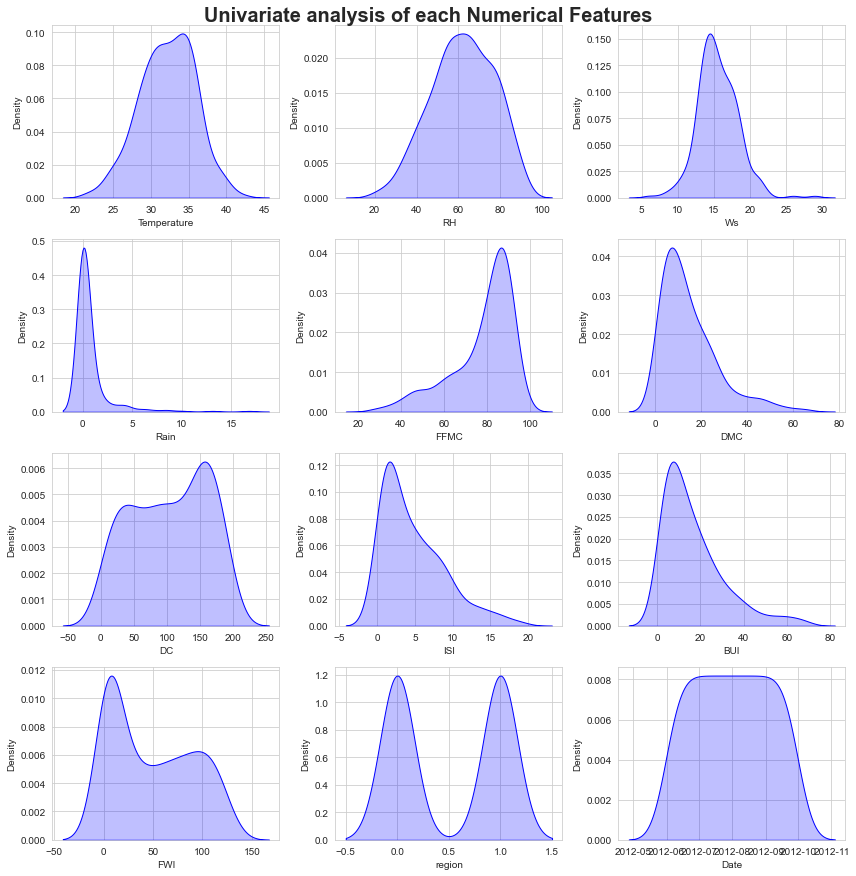

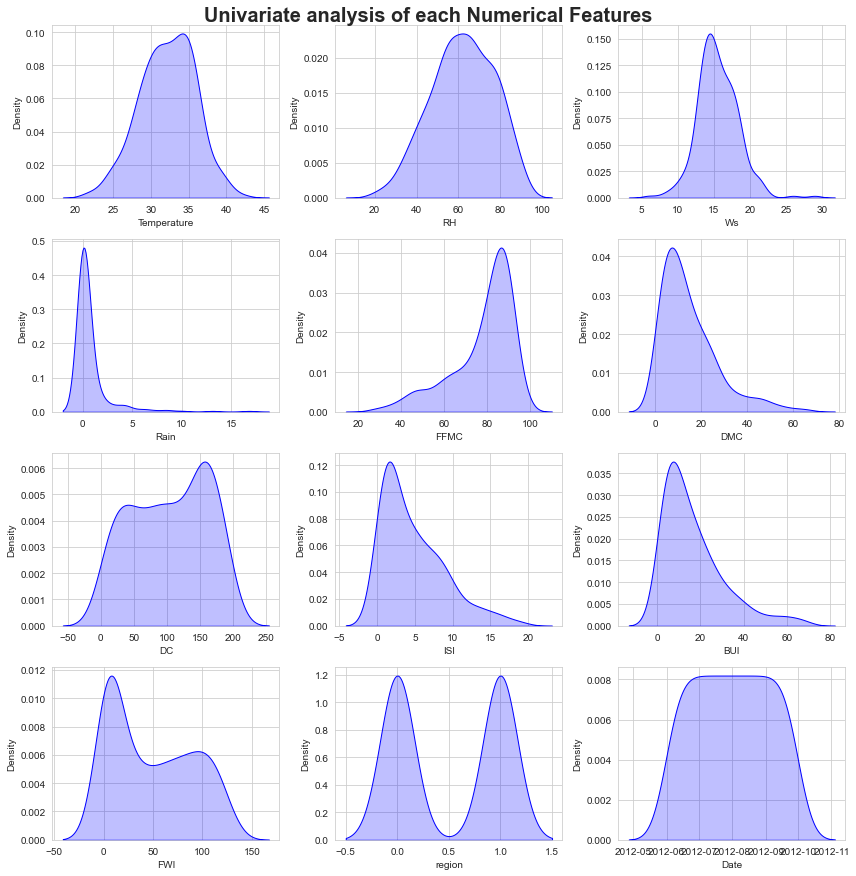

In [22]:
## KDE Plot to visualize patterns in each numerical feature
sns.set_style('whitegrid')
plt.figure(figsize=(12,15))
plt.suptitle('Univariate analysis of each Numerical Features', fontsize=20, fontweight='bold')

for i in range(0, len(numeric_features)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=data1[numeric_features[i]],shade=True, color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

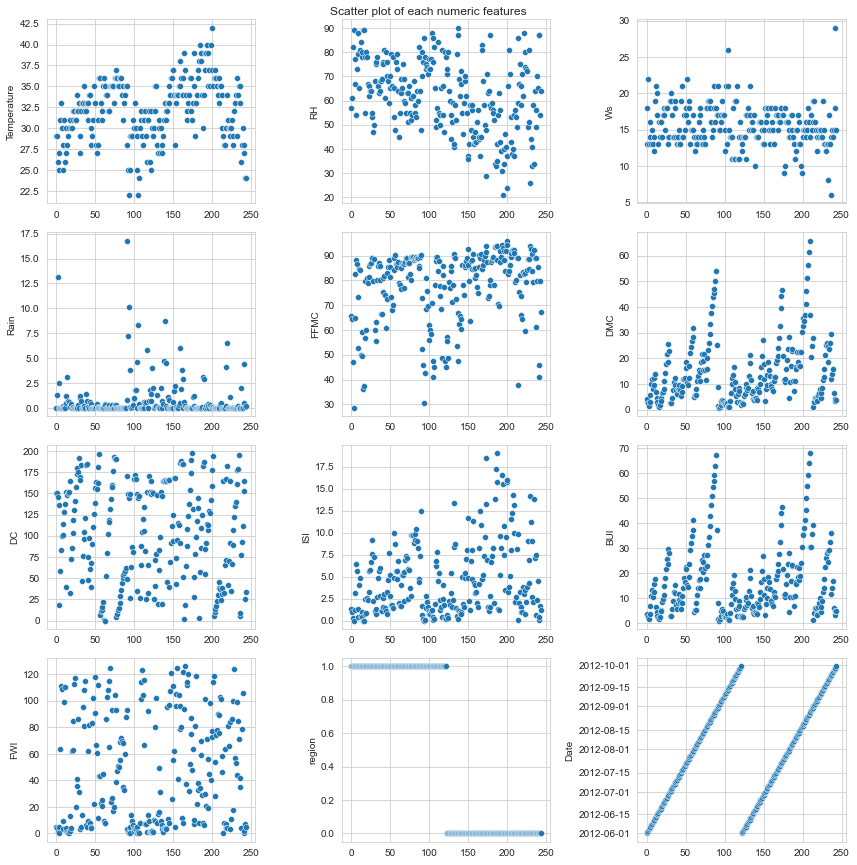

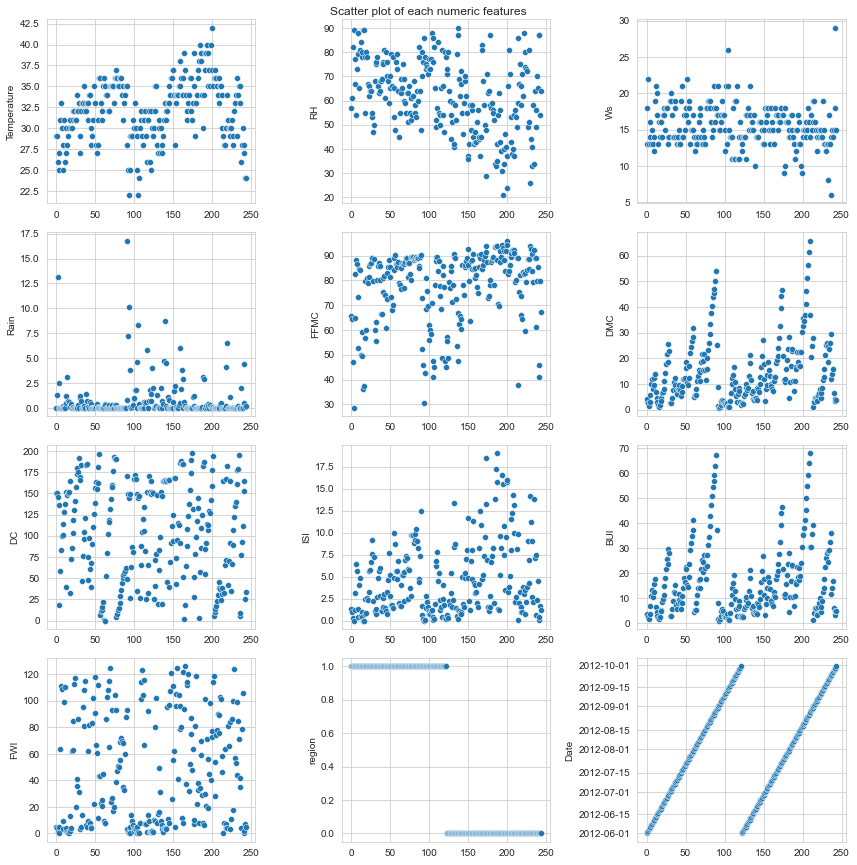

In [23]:
## Scatter Plot to visualize patterns in each numerical column
sns.set_style('whitegrid')
plt.figure(figsize=(12,15))
plt.suptitle('Scatter plot of each numeric features')

for i in range(0, len(numeric_features)):
    plt.subplot(5,3,i+1)
    sns.scatterplot(x=data1.index,y=numeric_features[i],data=data1)
    plt.tight_layout()

<AxesSubplot:>

<AxesSubplot:>

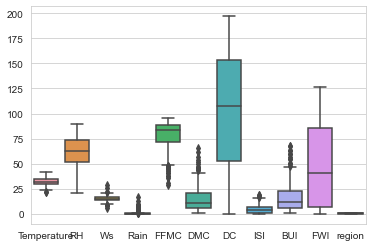

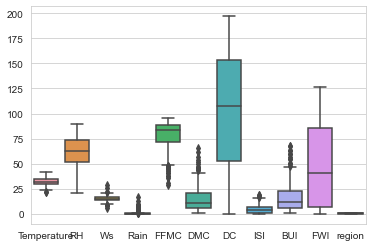

In [24]:
## Boxplot to find outliers
sns.boxplot(data=data1)

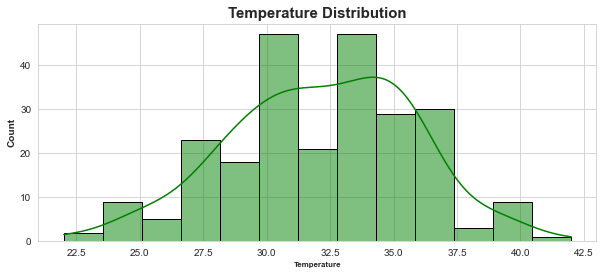

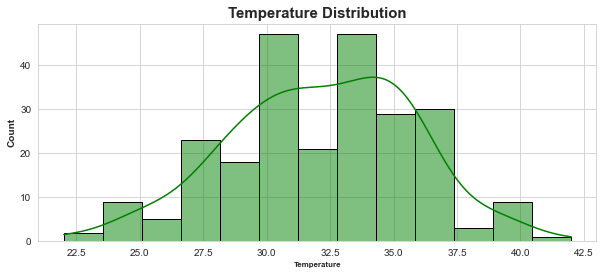

In [25]:
## Temperature distribution

plt.subplots(figsize=(10,4))
sns.histplot(x=data1.Temperature, ec='black',color='g',kde=True)
plt.title("Temperature Distribution", weight='bold', fontsize=15)
plt.ylabel("Count", weight='bold',fontsize=10)
plt.xlabel("Temperature",weight='bold',fontsize=8)
plt.show()

## observation: Temperature most is in range of 32.5 to 35

<AxesSubplot:xlabel='region', ylabel='Temperature'>

<AxesSubplot:xlabel='region', ylabel='Temperature'>

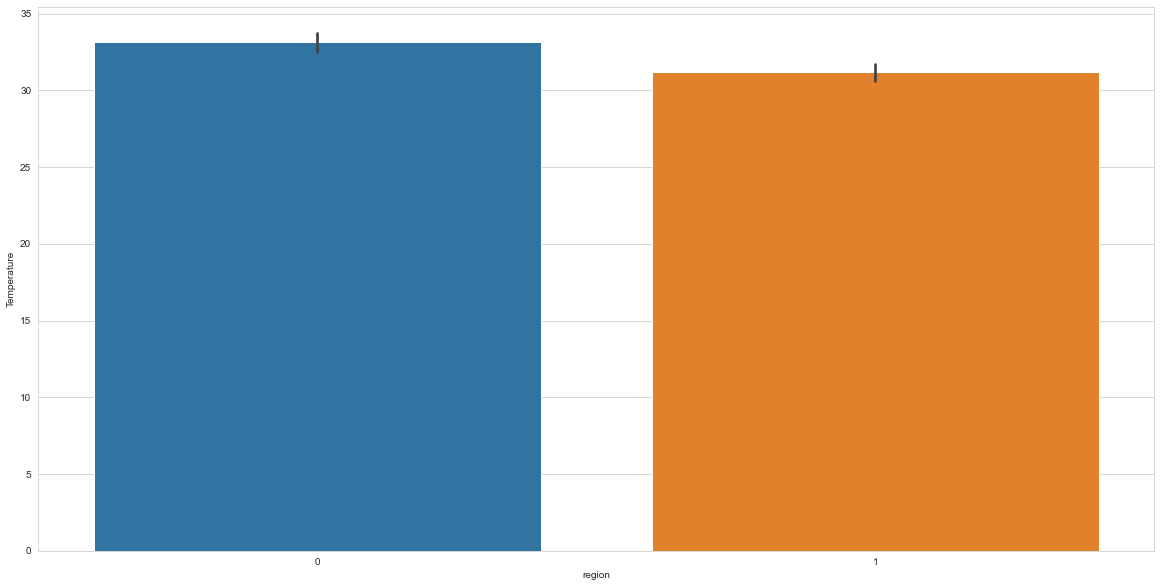

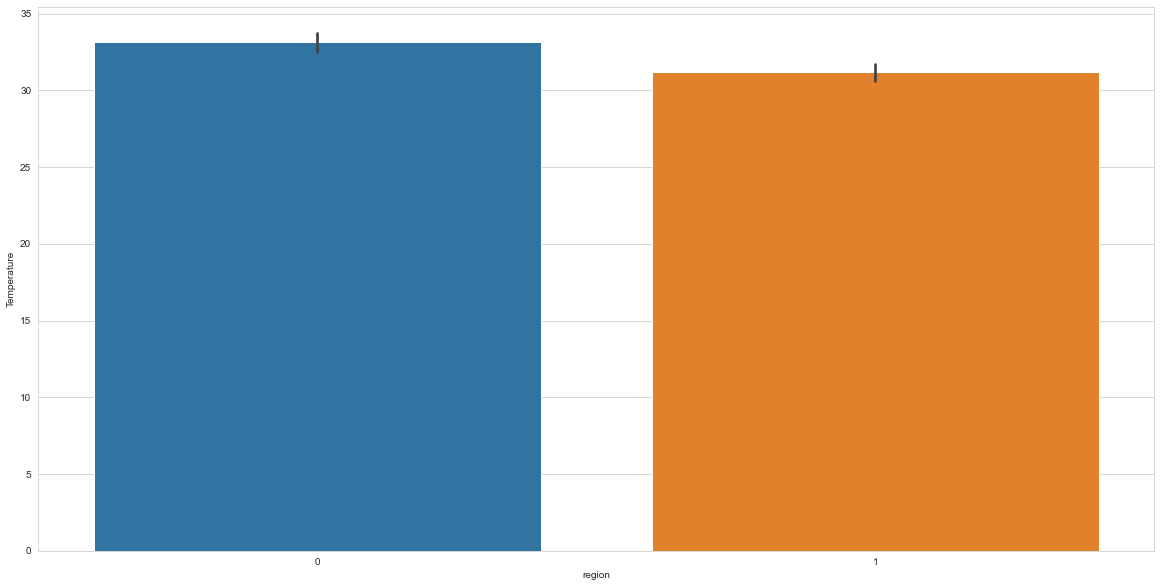

In [26]:
## Which region has most temperature

import matplotlib

matplotlib.rcParams['figure.figsize']=(20,10)
sns.barplot(x="region",y="Temperature", data=data1)

## Observation: Region'Sidi-Bel Abbes' has most temperature

<AxesSubplot:xlabel='Temperature', ylabel='Rain'>

<AxesSubplot:xlabel='Temperature', ylabel='Rain'>

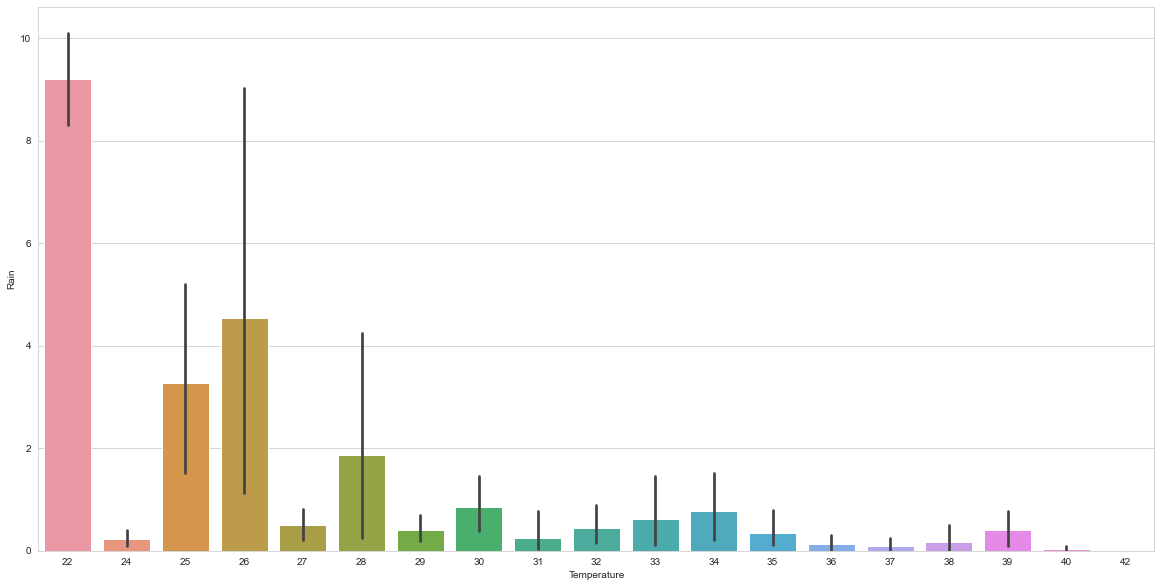

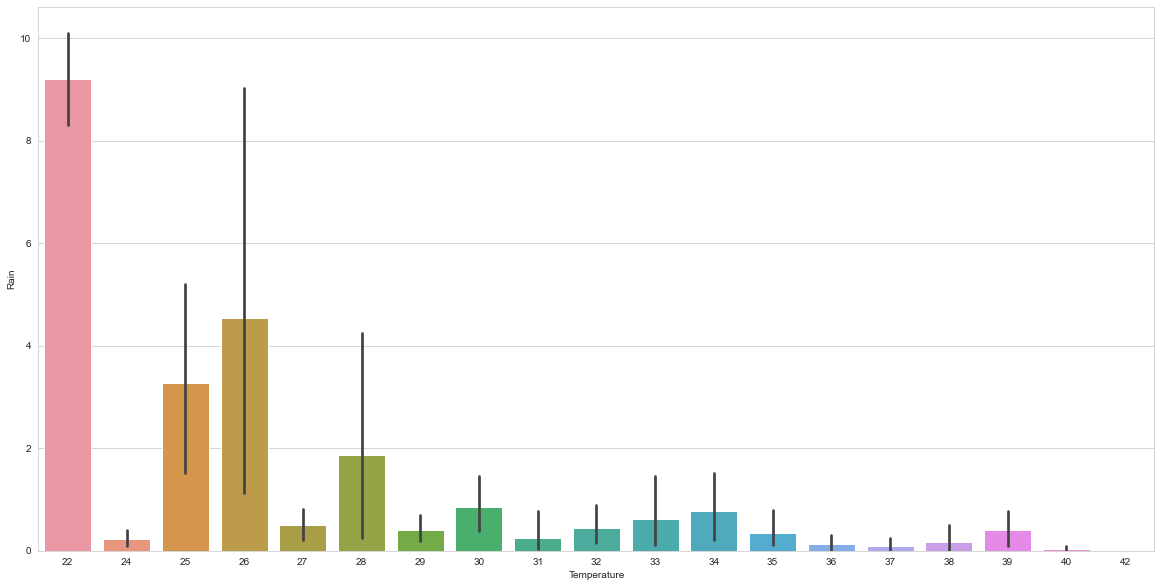

In [27]:
## Temperature vs Rain

import matplotlib

matplotlib.rcParams['figure.figsize']=(20,10)
sns.barplot(x="Temperature",y="Rain", data=data1)

## Observation: when temperature is around 22 , most of the rain occur
## when rain is higher, temperature is low

In [28]:
data1.dtypes

Temperature             int32
RH                      int32
Ws                      int32
Rain                  float64
FFMC                  float64
DMC                   float64
DC                      int32
ISI                   float64
BUI                   float64
FWI                     int32
region                  int32
Date           datetime64[ns]
dtype: object

Temperature             int32
RH                      int32
Ws                      int32
Rain                  float64
FFMC                  float64
DMC                   float64
DC                      int32
ISI                   float64
BUI                   float64
FWI                     int32
region                  int32
Date           datetime64[ns]
dtype: object

In [29]:
data1.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region
Temperature,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,-0.165840,0.607551,0.455504,0.380581,-0.273496
RH,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,0.041651,-0.690637,-0.348587,-0.295093,0.406424
Ws,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.040958,0.015248,0.029756,-0.081447,0.176829
Rain,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,0.324748,-0.347105,-0.299171,-0.340412,0.041080
FFMC,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,-0.319086,0.739730,0.589652,0.617445,-0.224680
DMC,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,-0.200609,0.674499,0.982073,0.384628,-0.191094
DC,-0.165840,0.041651,0.040958,0.324748,-0.319086,-0.200609,1.000000,-0.152717,-0.226445,-0.118684,0.016293
ISI,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,-0.152717,1.000000,0.635891,0.412512,-0.268421
BUI,0.455504,-0.348587,0.029756,-0.299171,0.589652,0.982073,-0.226445,0.635891,1.000000,0.375234,-0.087370
FWI,0.380581,-0.295093,-0.081447,-0.340412,0.617445,0.384628,-0.118684,0.412512,0.375234,1.000000,-0.108099


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region
Temperature,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,-0.165840,0.607551,0.455504,0.380581,-0.273496
RH,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,0.041651,-0.690637,-0.348587,-0.295093,0.406424
Ws,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.040958,0.015248,0.029756,-0.081447,0.176829
Rain,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,0.324748,-0.347105,-0.299171,-0.340412,0.041080
FFMC,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,-0.319086,0.739730,0.589652,0.617445,-0.224680
DMC,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,-0.200609,0.674499,0.982073,0.384628,-0.191094
DC,-0.165840,0.041651,0.040958,0.324748,-0.319086,-0.200609,1.000000,-0.152717,-0.226445,-0.118684,0.016293
ISI,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,-0.152717,1.000000,0.635891,0.412512,-0.268421
BUI,0.455504,-0.348587,0.029756,-0.299171,0.589652,0.982073,-0.226445,0.635891,1.000000,0.375234,-0.087370
FWI,0.380581,-0.295093,-0.081447,-0.340412,0.617445,0.384628,-0.118684,0.412512,0.375234,1.000000,-0.108099


<AxesSubplot:>

<AxesSubplot:>

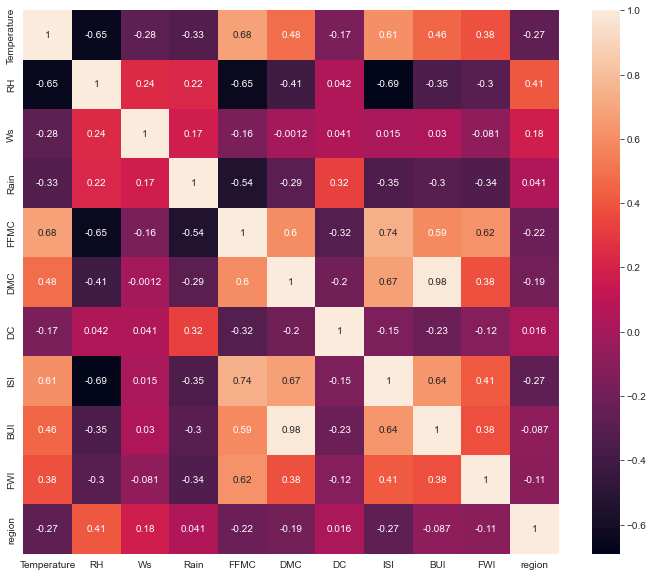

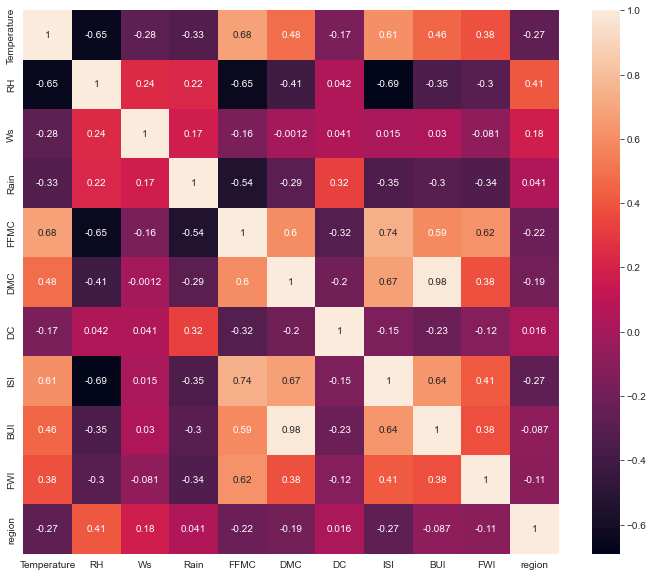

In [30]:
plt.figure(figsize=(12,10))
sns.heatmap(data1.corr(),annot =True)

<AxesSubplot:xlabel='Temperature', ylabel='Rain'>

<AxesSubplot:xlabel='Temperature', ylabel='Rain'>

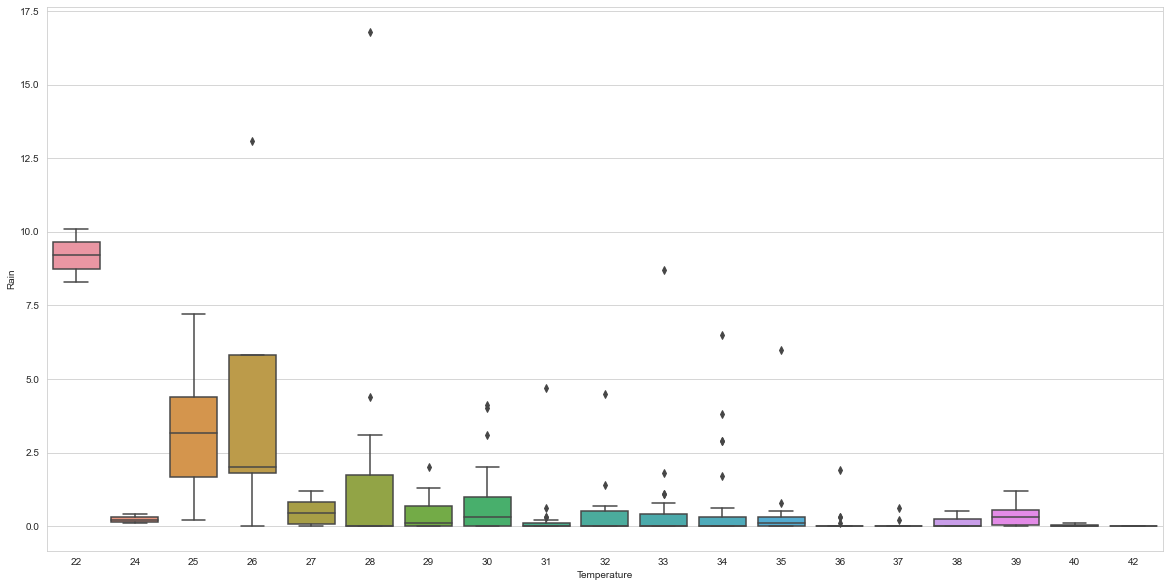

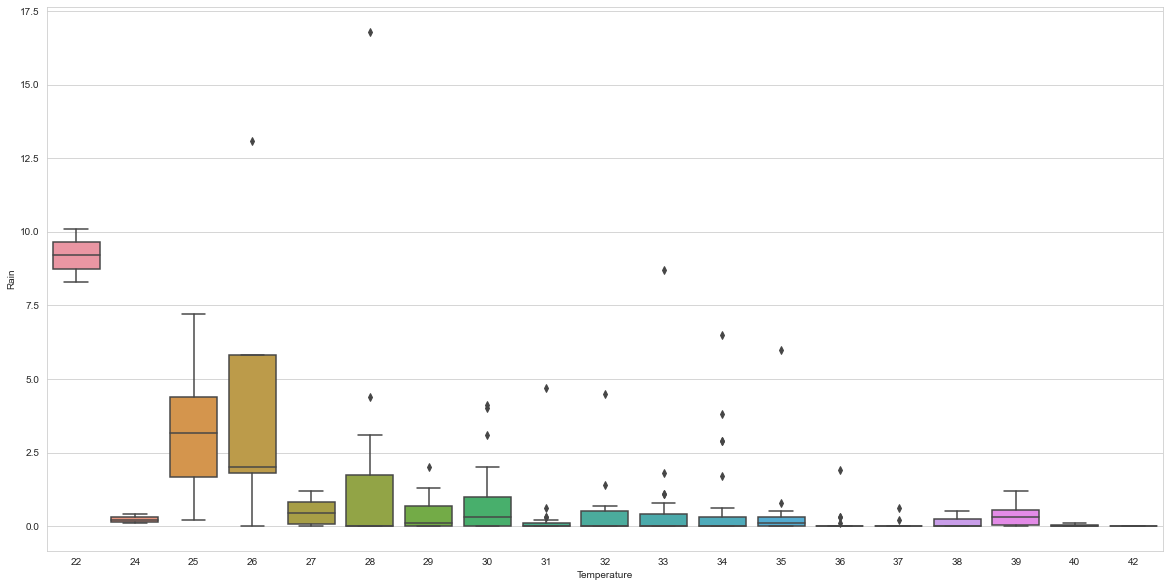

In [31]:
sns.boxplot(x='Temperature',y='Rain',data=data1)

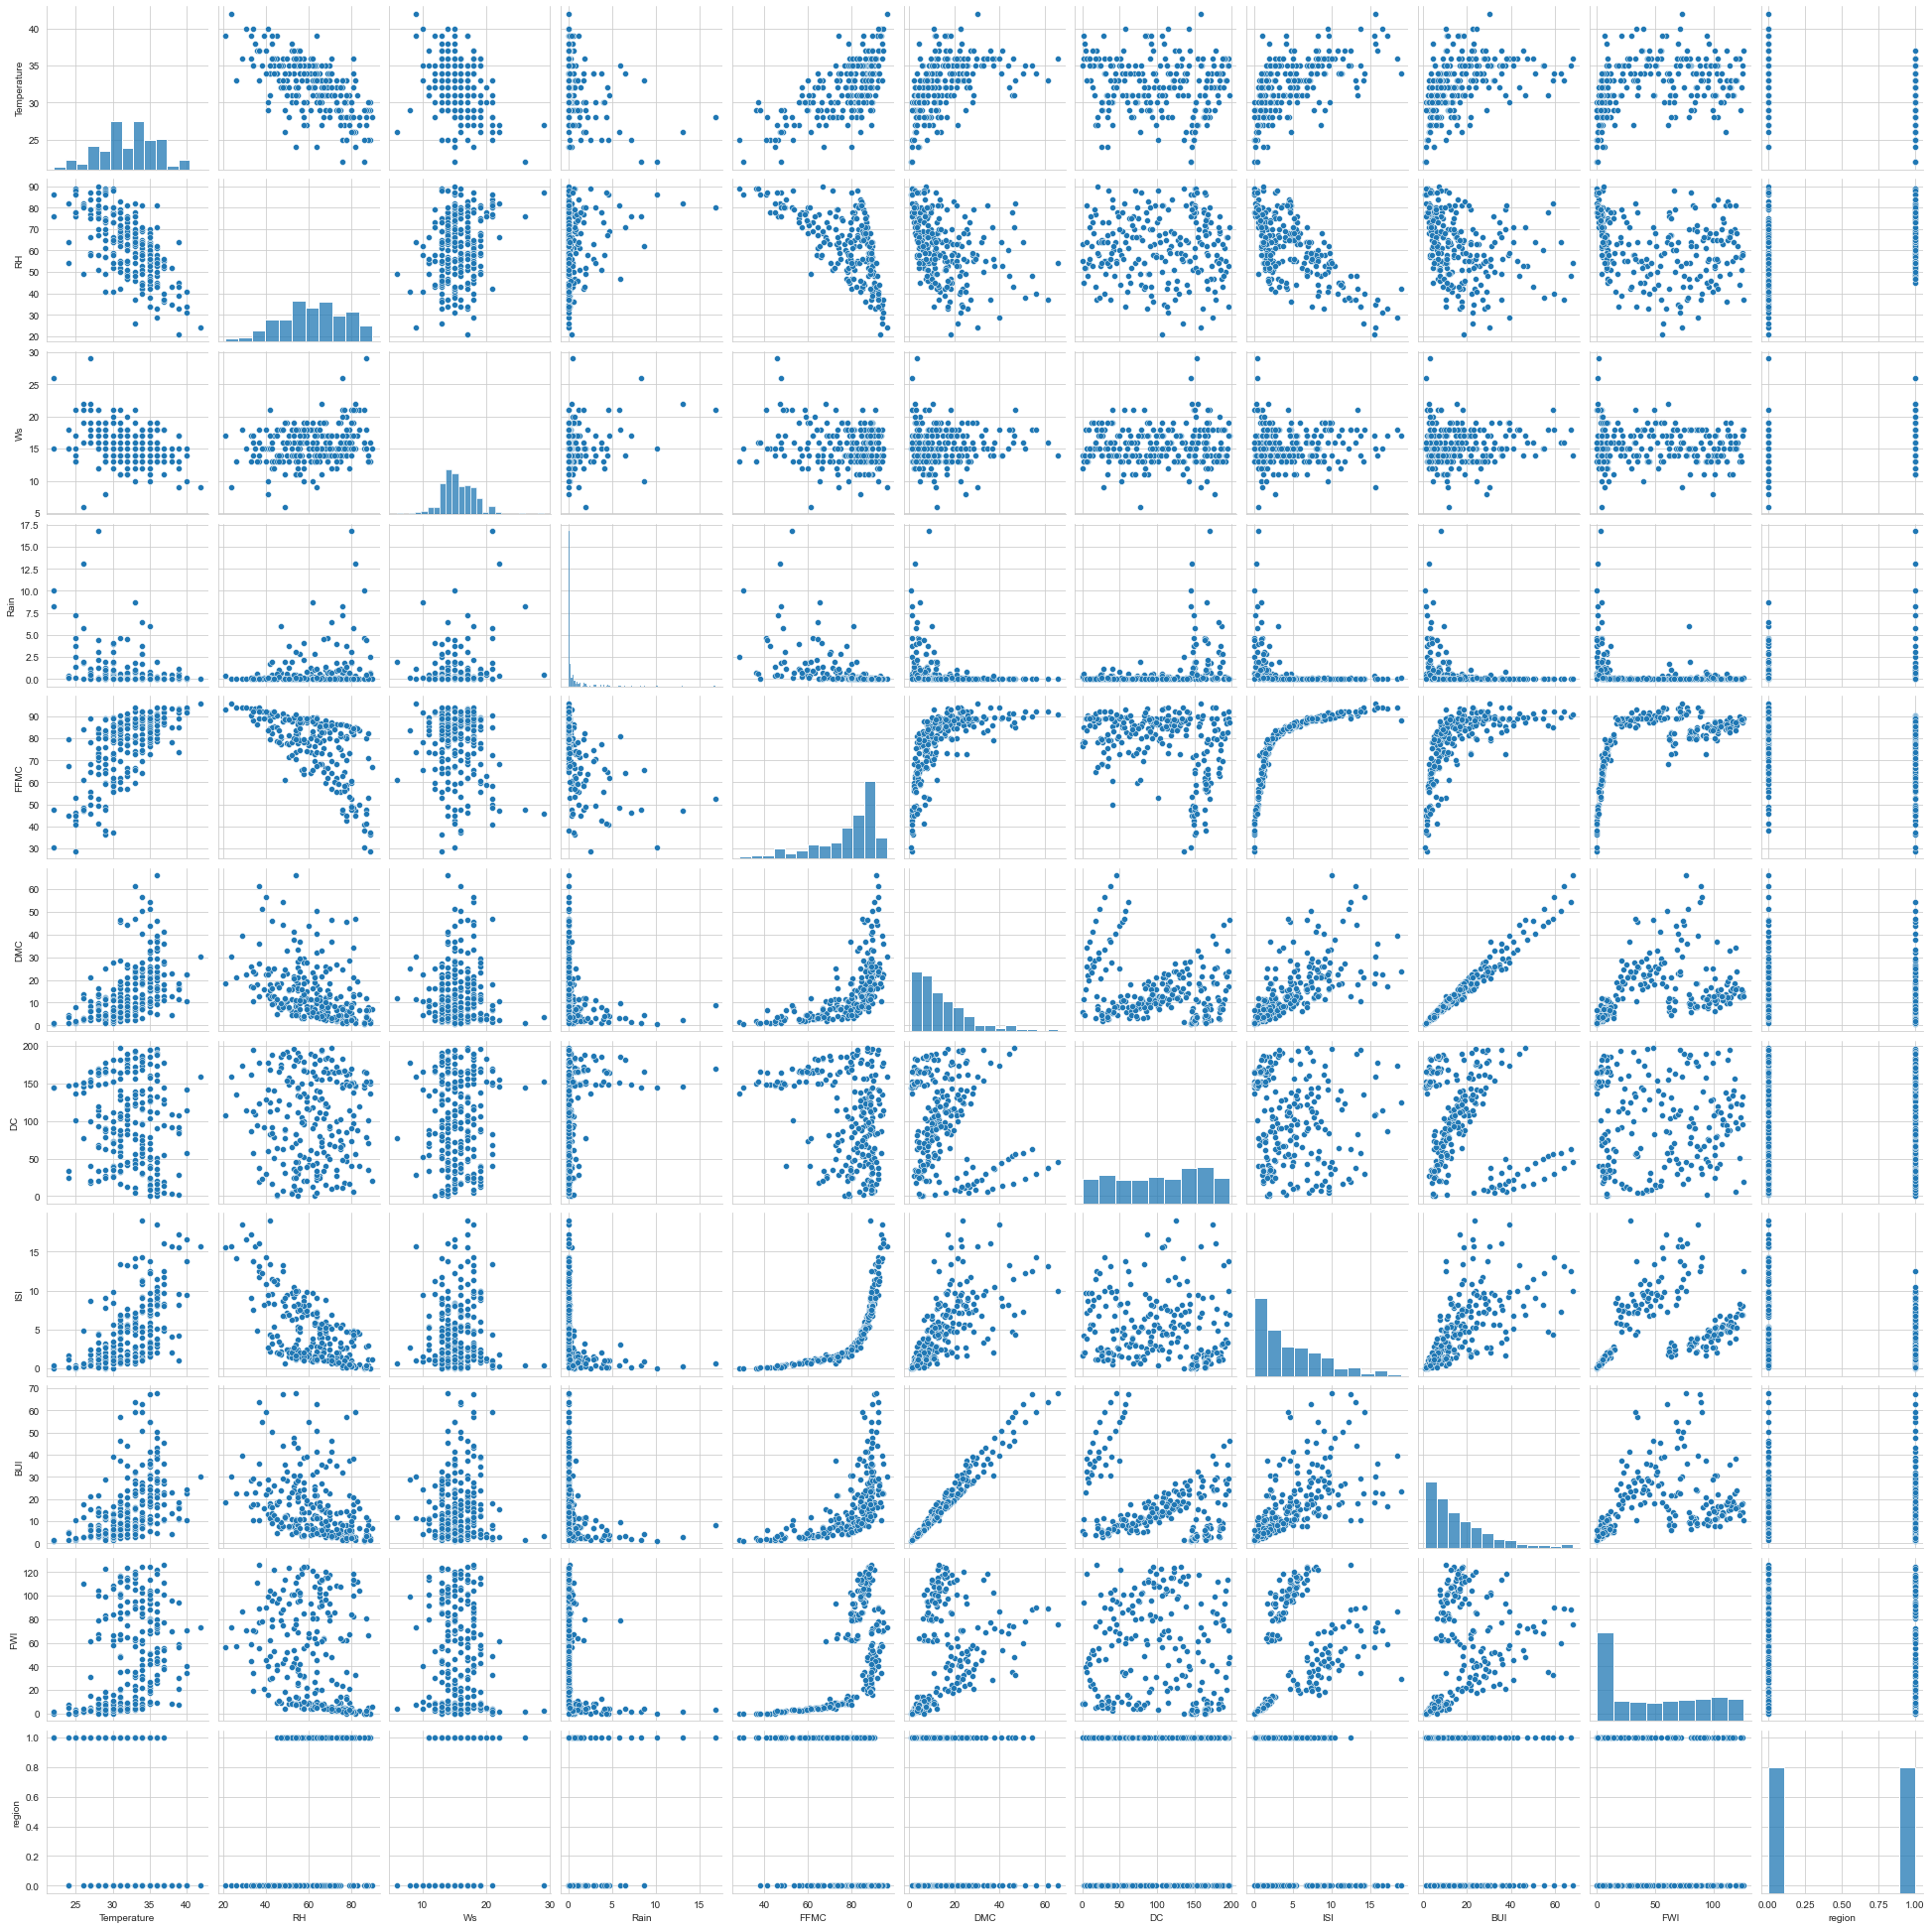

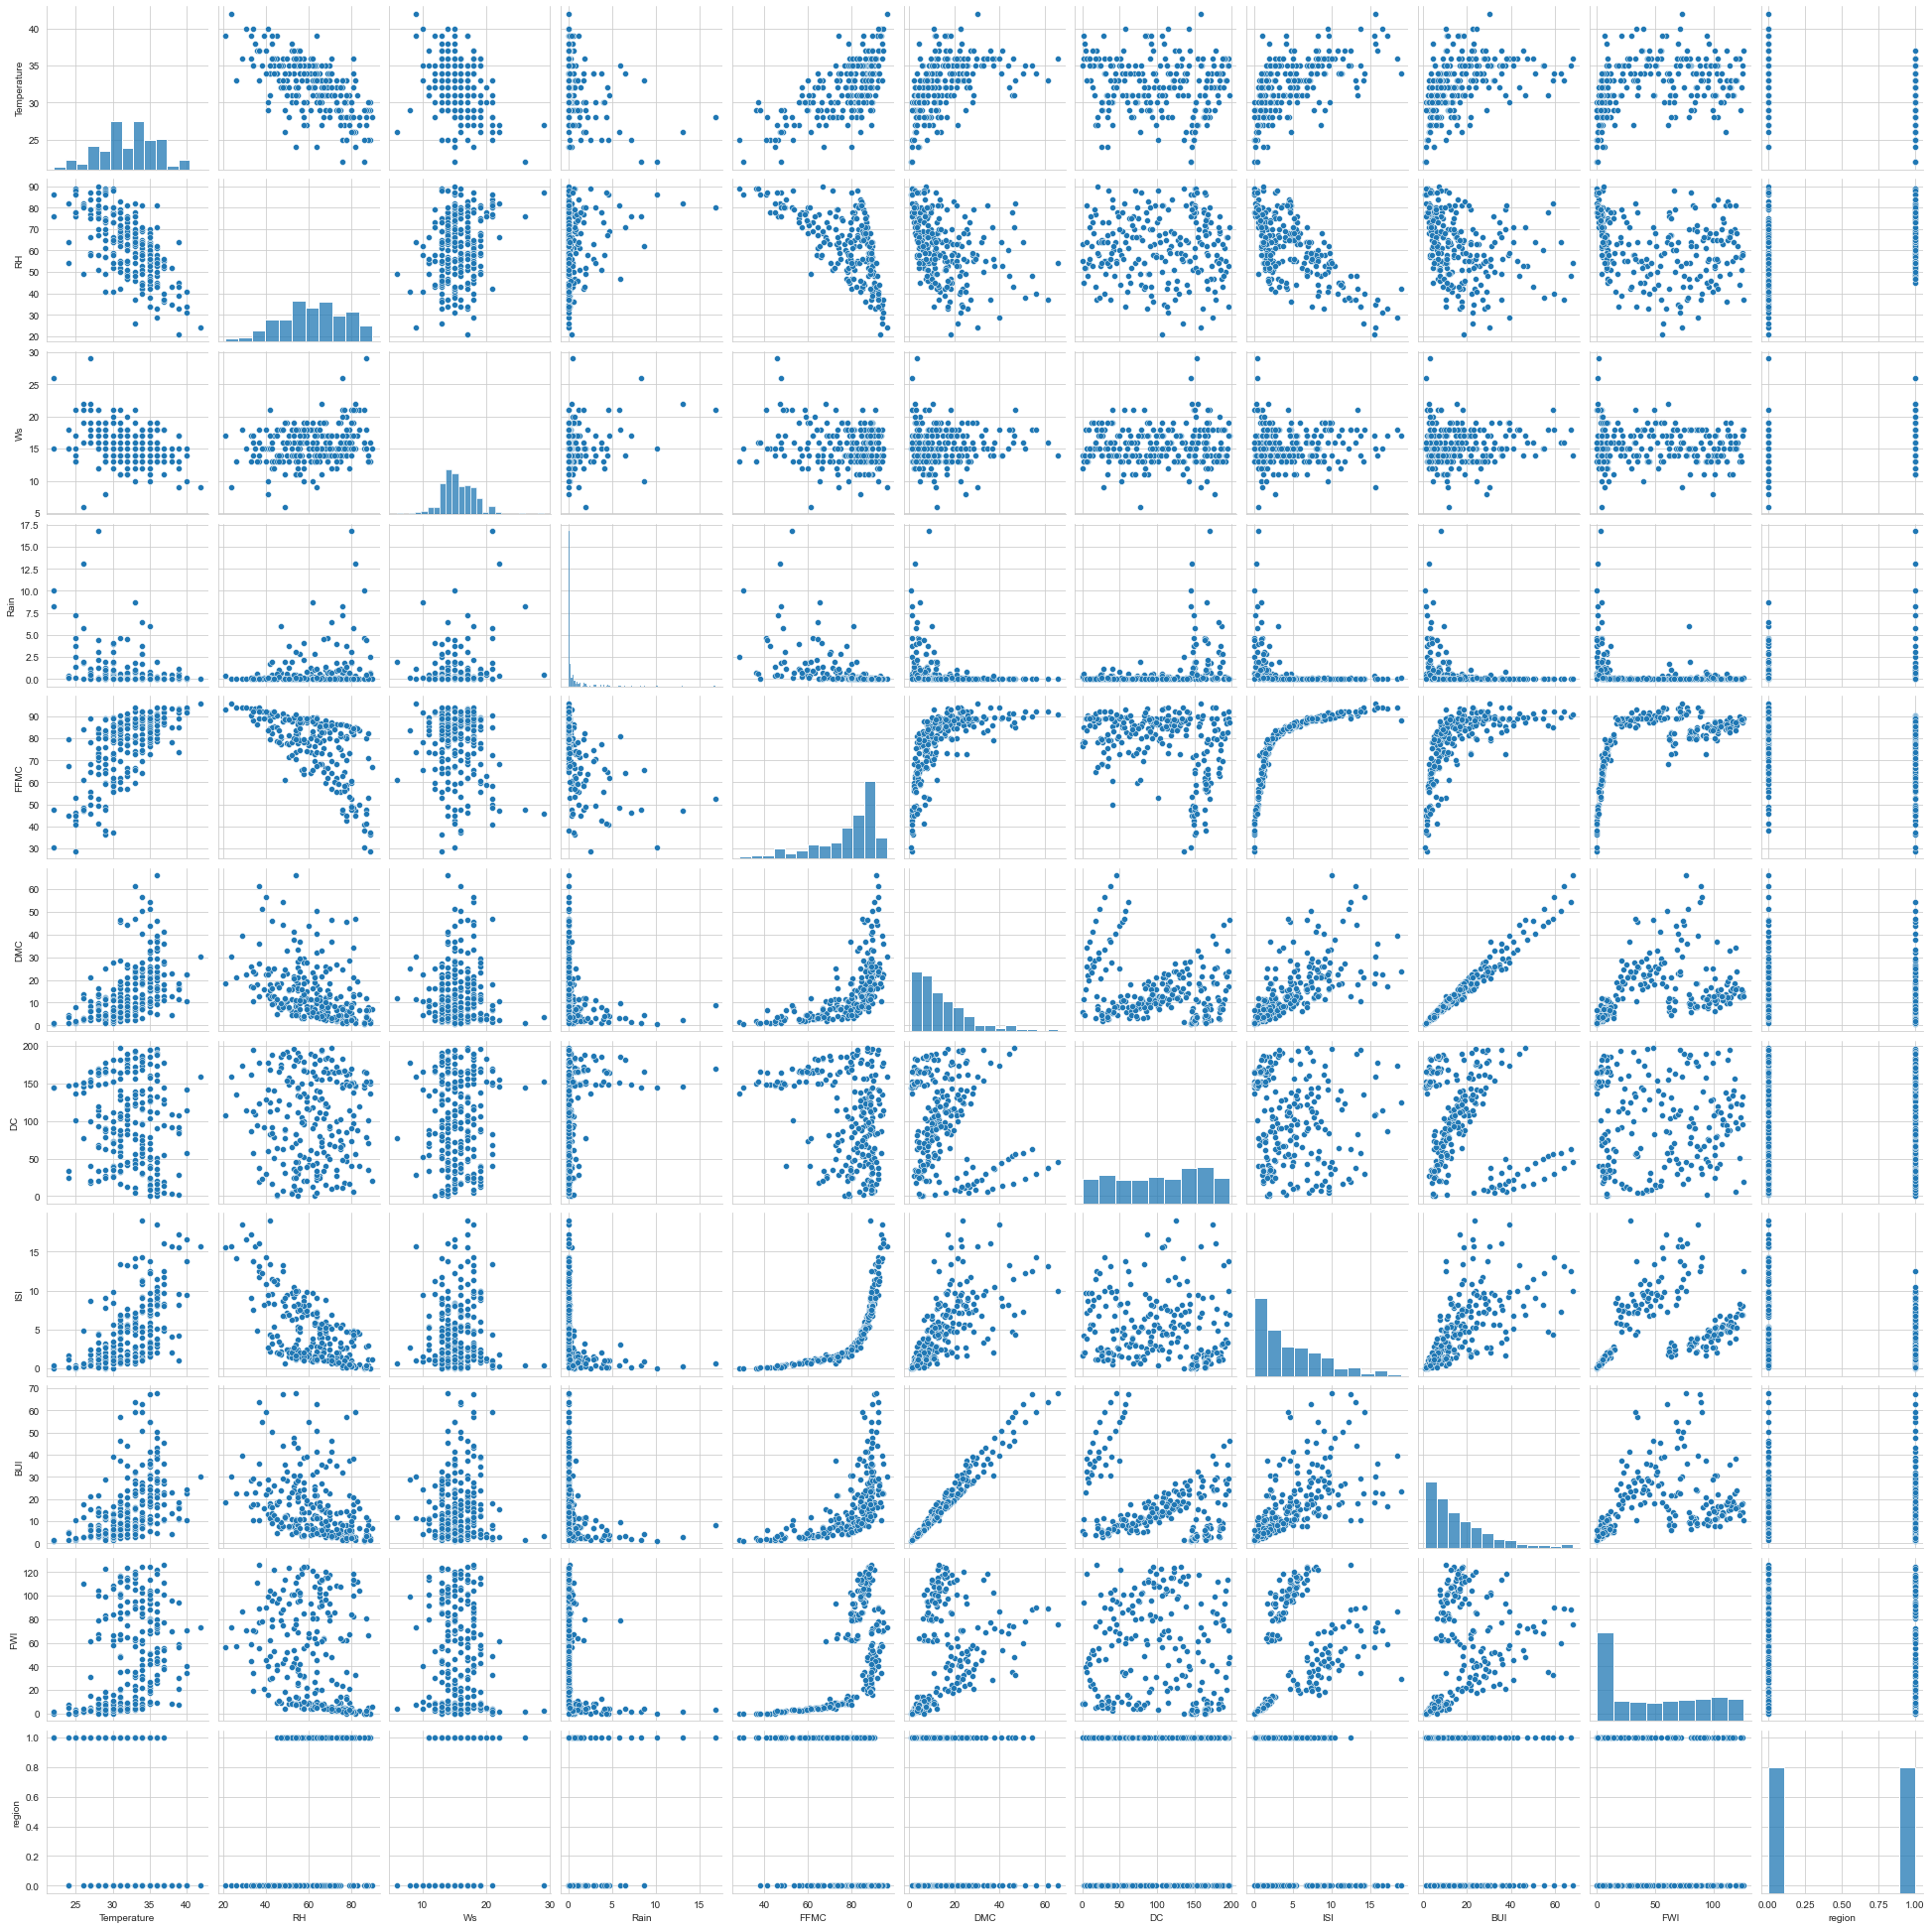

In [32]:
sns.pairplot(data1)

<AxesSubplot:xlabel='Temperature'>

<AxesSubplot:xlabel='Temperature'>

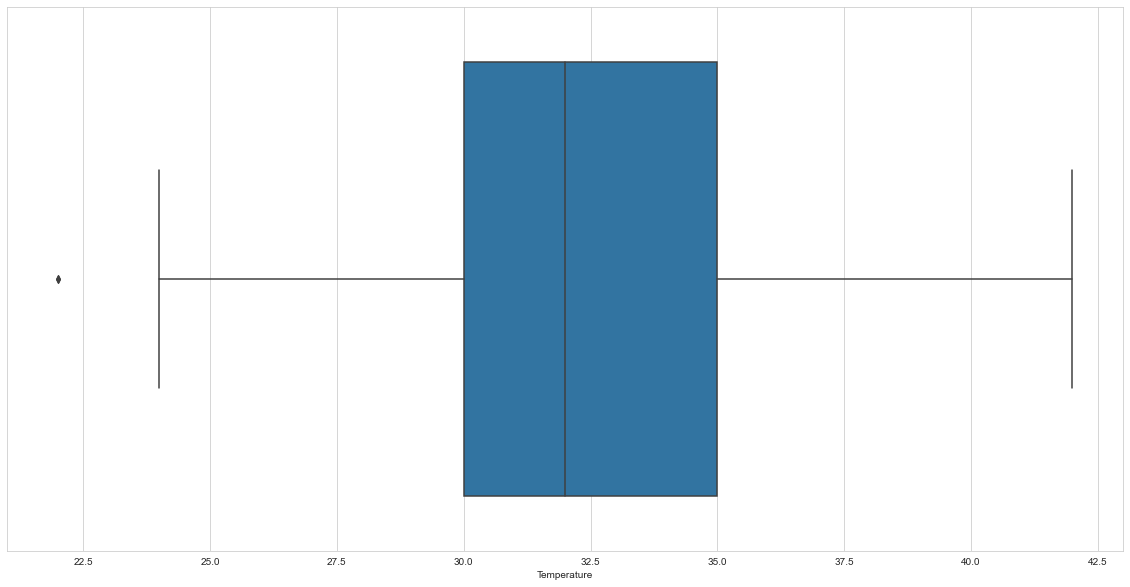

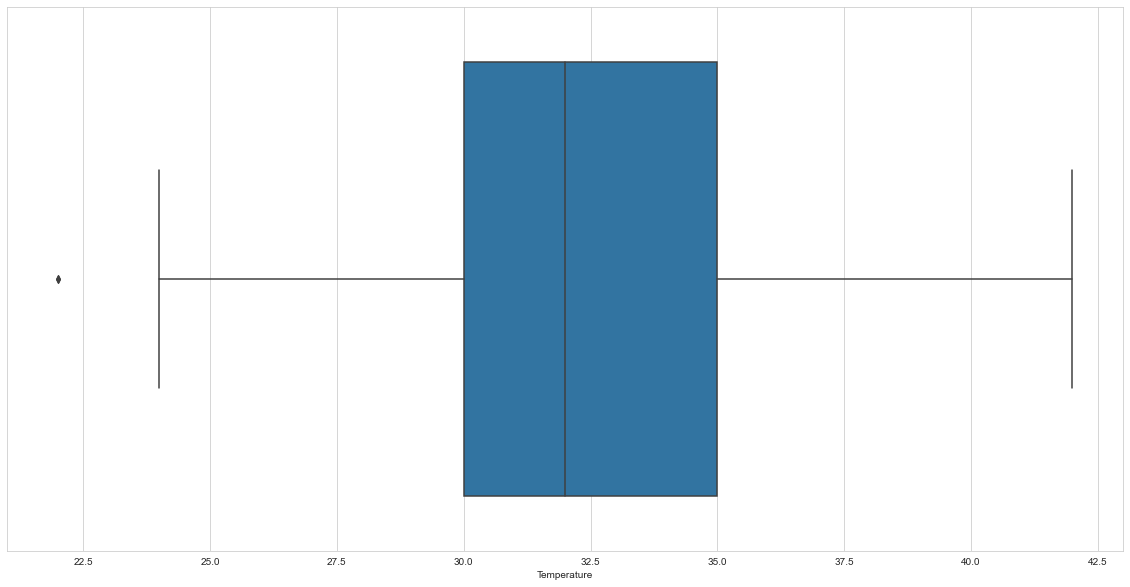

In [33]:
sns.boxplot(data1['Temperature'])

<AxesSubplot:>

<AxesSubplot:>

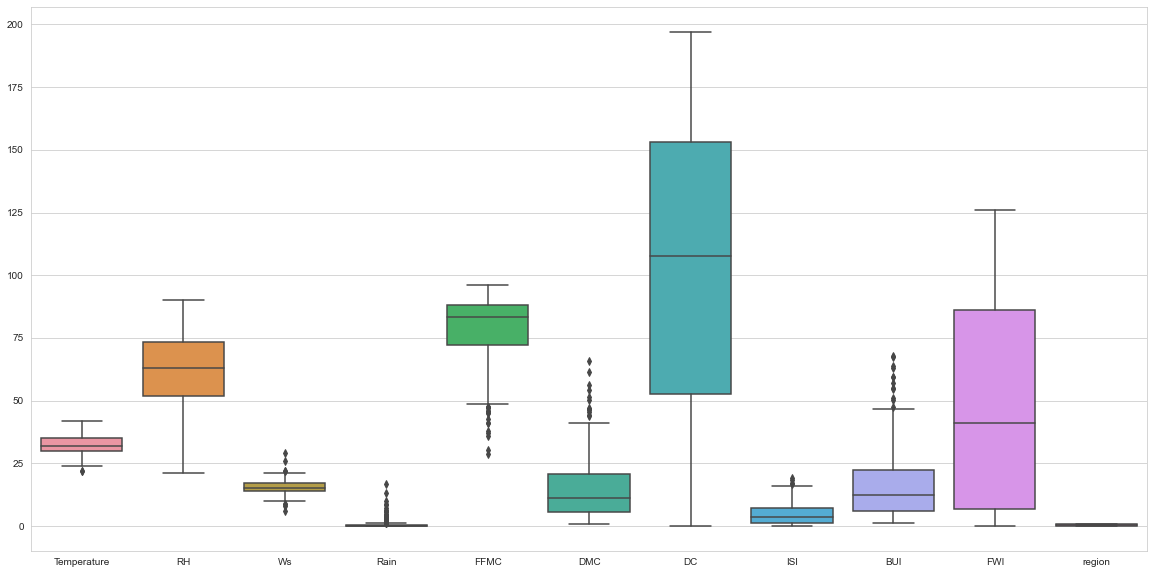

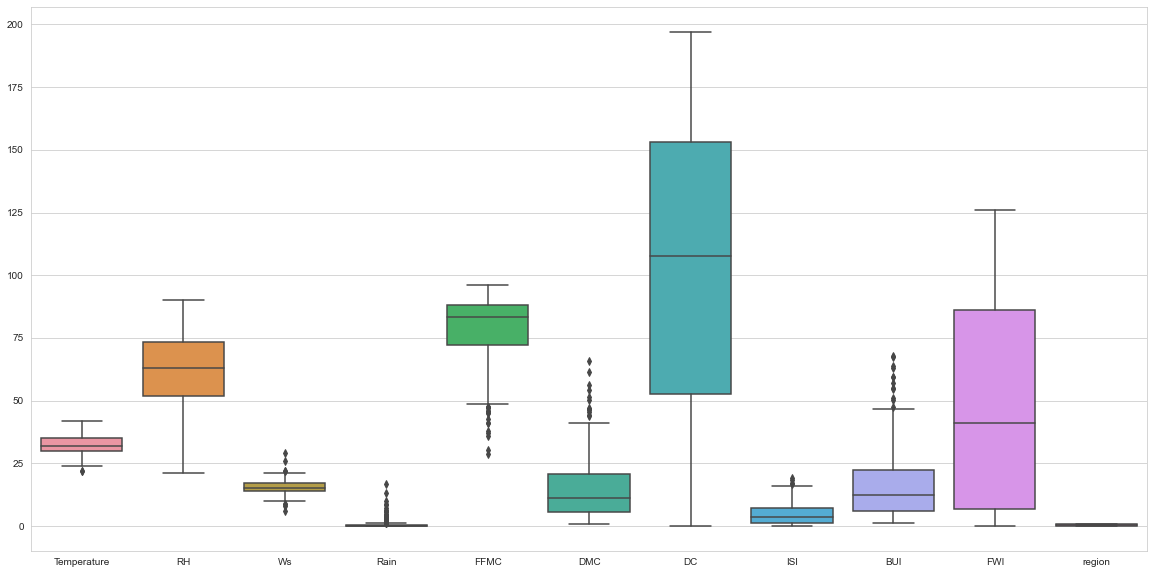

In [34]:
sns.boxplot(data=data1)

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

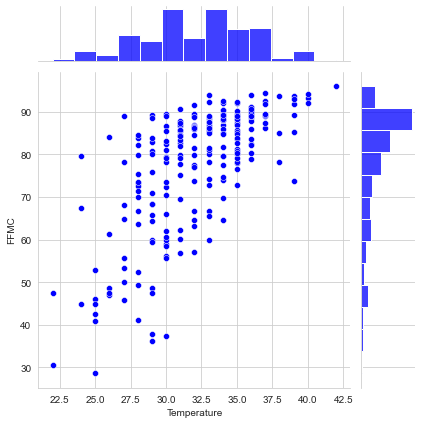

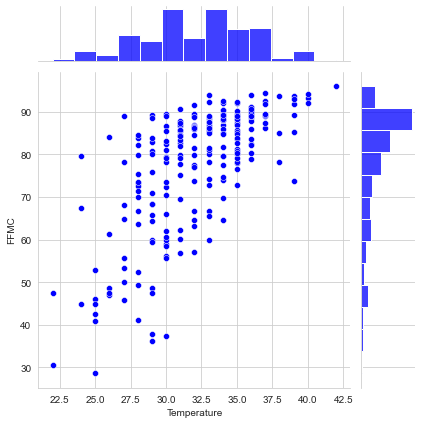

In [35]:
# Tempersture Vs FFMC
plt.figure(figsize=(8,8))
sns.jointplot(x='Temperature',y='FFMC', data=data1, color='blue')

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

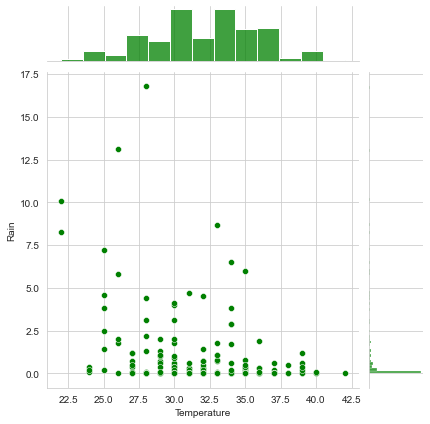

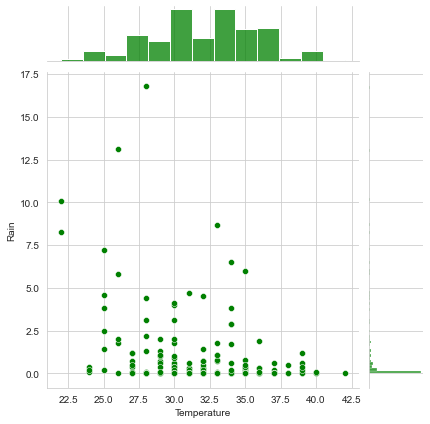

In [36]:
# Tempersture Vs Rain
plt.figure(figsize=(8,8))
sns.jointplot(x='Temperature',y='Rain', data=data1, color='g')

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

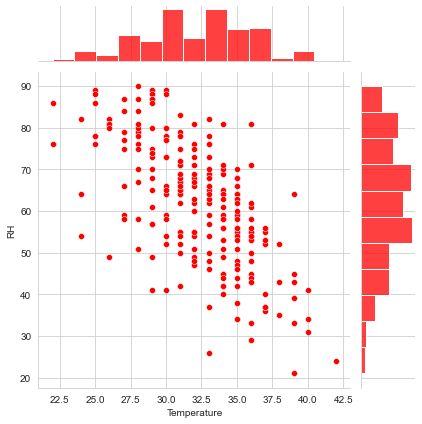

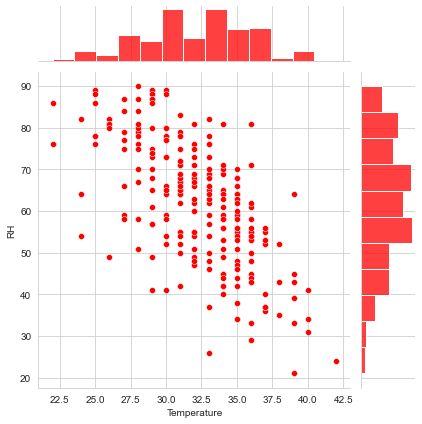

In [37]:
# Tempersture Vs Ws
plt.figure(figsize=(8,8))
sns.jointplot(x='Temperature',y='RH', data=data1, color='r')

<AxesSubplot:xlabel='RH', ylabel='Temperature'>

<AxesSubplot:xlabel='RH', ylabel='Temperature'>

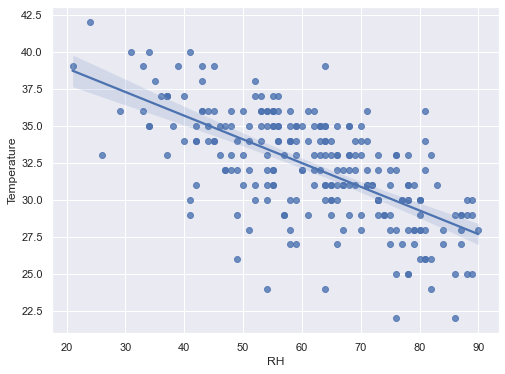

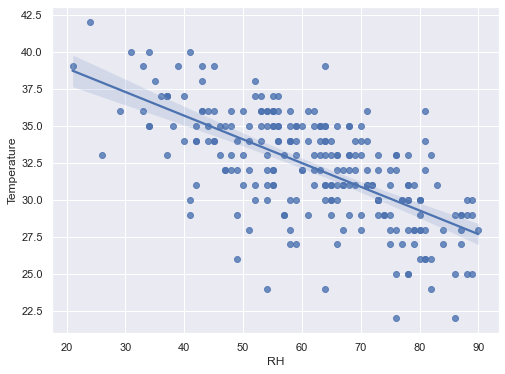

In [38]:
sns.set(rc={'figure.figsize':(8,6)})
sns.regplot(x="RH",y="Temperature",data=data1)

<AxesSubplot:xlabel='Rain', ylabel='Temperature'>

<AxesSubplot:xlabel='Rain', ylabel='Temperature'>

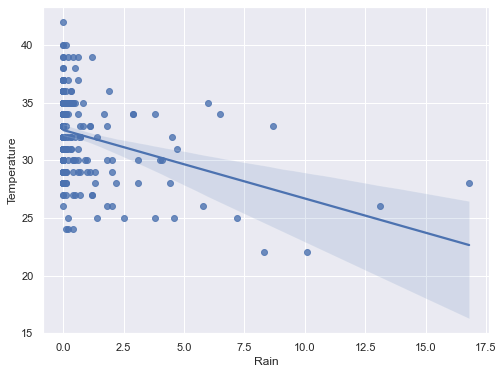

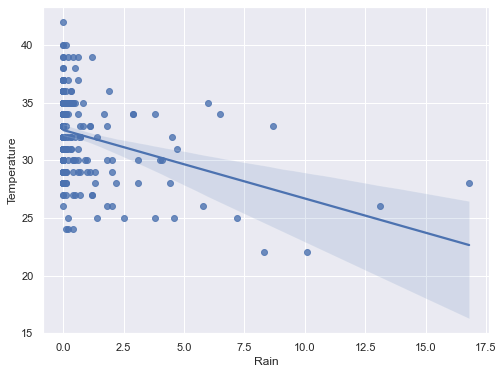

In [39]:
sns.set(rc={'figure.figsize':(8,6)})
sns.regplot(x="Rain",y="Temperature",data=data1)

<AxesSubplot:xlabel='FFMC', ylabel='Temperature'>

<AxesSubplot:xlabel='FFMC', ylabel='Temperature'>

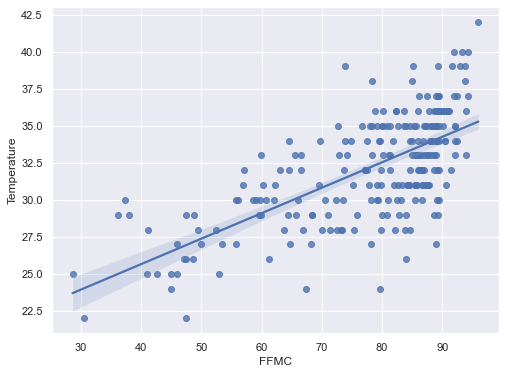

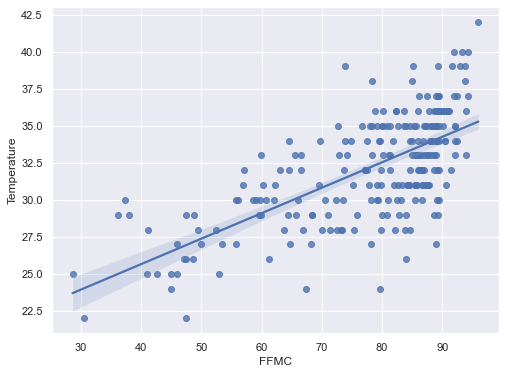

In [40]:
sns.set(rc={'figure.figsize':(8,6)})
sns.regplot(x="FFMC",y="Temperature",data=data1)

Preparing the data

In [41]:
data1.columns


Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'region', 'Date'],
      dtype='object')

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'region', 'Date'],
      dtype='object')

In [42]:
## Independent X And Dependent y Features

## Independent Features
X =pd.DataFrame(data1,columns=['RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI','FWI', 'region',])
## Dependent y Features
y =pd.DataFrame(data1,columns=['Temperature'])

In [43]:
## Independent Features
X

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region
0,57,18,0.0,65.7,3.4,150,1.3,3.4,5,1
1,61,13,1.3,64.4,4.1,150,1.0,3.9,4,1
2,82,22,13.1,47.1,2.5,146,0.3,2.7,1,1
3,89,13,2.5,28.6,1.3,136,0.0,1.7,0,1
4,77,16,0.0,64.8,3.0,18,1.2,3.9,5,1
...,...,...,...,...,...,...,...,...,...,...
239,65,14,0.0,85.4,16.0,112,4.5,16.9,106,0
240,87,15,4.4,41.1,6.5,164,0.1,6.2,0,0
241,87,29,0.5,45.9,3.5,153,0.4,3.4,2,0
242,54,18,0.1,79.7,4.3,25,1.7,5.1,7,0


,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region
0,57,18,0.0,65.7,3.4,150,1.3,3.4,5,1
1,61,13,1.3,64.4,4.1,150,1.0,3.9,4,1
2,82,22,13.1,47.1,2.5,146,0.3,2.7,1,1
3,89,13,2.5,28.6,1.3,136,0.0,1.7,0,1
4,77,16,0.0,64.8,3.0,18,1.2,3.9,5,1
...,...,...,...,...,...,...,...,...,...,...
239,65,14,0.0,85.4,16.0,112,4.5,16.9,106,0
240,87,15,4.4,41.1,6.5,164,0.1,6.2,0,0
241,87,29,0.5,45.9,3.5,153,0.4,3.4,2,0
242,54,18,0.1,79.7,4.3,25,1.7,5.1,7,0


In [44]:
## Dependent y Features
y

,Temperature
0,29
1,29
2,26
3,25
4,27
...,...
239,30
240,28
241,27
242,24


,Temperature
0,29
1,29
2,26
3,25
4,27
...,...
239,30
240,28
241,27
242,24


In [45]:
# importing train_test_split 
from sklearn.model_selection import train_test_split  

# Splitting Data Into Train and Test data
#test size : how much percent of data points allocated for test data, here we have selected 20 percent so 0.20

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

##observation:
## X_train output feacture is y_train
## X _test output is y_test

In [46]:
# printing the number of rows and columns
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

## observation:
##  the number of rows in  X_train and y-train is same
## the number of rows in X_test and y_test is same.
## there is one feature in X_train and y_train.
## total number of rows is 20+5 =25 

(170, 10) (74, 10) (170, 1) (74, 1)
(170, 10) (74, 10) (170, 1) (74, 1)


In [47]:
## Standardize or feature scaling the datasets
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [48]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [49]:
X_train

array([[-1.94944205,  0.57272408, -0.38492678, ...,  0.88897112,
         0.63853721, -0.98830369],
       [ 1.24498821, -0.18496536, -0.38492678, ..., -0.16108818,
         1.36421459, -0.98830369],
       [-0.25027701,  0.19387936, -0.38492678, ...,  0.20052165,
        -0.58760732, -0.98830369],
       ...,
       [ 0.90515521,  0.57272408,  2.89606475, ..., -1.03034256,
        -1.11309783,  1.01183473],
       [-0.38621022,  0.19387936, -0.38492678, ..., -0.06373169,
         1.83965838, -0.98830369],
       [ 0.97312181,  2.08810297,  0.4353211 , ..., -0.98861835,
        -1.06305112,  1.01183473]])

array([[-1.94944205,  0.57272408, -0.38492678, ...,  0.88897112,
         0.63853721, -0.98830369],
       [ 1.24498821, -0.18496536, -0.38492678, ..., -0.16108818,
         1.36421459, -0.98830369],
       [-0.25027701,  0.19387936, -0.38492678, ...,  0.20052165,
        -0.58760732, -0.98830369],
       ...,
       [ 0.90515521,  0.57272408,  2.89606475, ..., -1.03034256,
        -1.11309783,  1.01183473],
       [-0.38621022,  0.19387936, -0.38492678, ..., -0.06373169,
         1.83965838, -0.98830369],
       [ 0.97312181,  2.08810297,  0.4353211 , ..., -0.98861835,
        -1.06305112,  1.01183473]])

In [50]:
X_test

array([[ 0.08955599, -0.18496536, -0.38492678,  0.65580274, -0.03457597,
         0.65694673,  0.25879661,  0.11707323,  1.78961167,  1.01183473],
       [-0.59011002, -0.94265481, -0.38492678,  0.75929927, -0.37892248,
        -0.3301753 ,  0.42680969, -0.39752537,  1.63947152,  1.01183473],
       [-0.99790963,  0.19387936, -0.38492678,  0.71790066, -0.53908364,
        -1.01094911,  0.52281716, -0.61310046,  1.48933137, -0.98830369],
       [-0.65807662,  0.57272408, -0.15708015,  0.20731776,  0.48594782,
        -1.33431667, -0.46125943,  0.97241954,  1.38923794, -0.98830369],
       [-1.47367584, -2.07918898, -0.33935746,  1.02149049,  0.63810093,
         0.67396607,  1.1708676 ,  0.5273613 , -0.13718688, -0.98830369],
       [ 0.08955599, -2.4580337 ,  0.16190514, -0.23426745, -0.23477743,
        -1.26623929, -0.84528932, -0.36275519, -0.96295768, -0.98830369],
       [-1.60960904, -0.18496536, -0.29378813,  0.83519673,  0.09355296,
        -0.17700119,  0.85884332, -0.05677765

array([[ 0.08955599, -0.18496536, -0.38492678,  0.65580274, -0.03457597,
         0.65694673,  0.25879661,  0.11707323,  1.78961167,  1.01183473],
       [-0.59011002, -0.94265481, -0.38492678,  0.75929927, -0.37892248,
        -0.3301753 ,  0.42680969, -0.39752537,  1.63947152,  1.01183473],
       [-0.99790963,  0.19387936, -0.38492678,  0.71790066, -0.53908364,
        -1.01094911,  0.52281716, -0.61310046,  1.48933137, -0.98830369],
       [-0.65807662,  0.57272408, -0.15708015,  0.20731776,  0.48594782,
        -1.33431667, -0.46125943,  0.97241954,  1.38923794, -0.98830369],
       [-1.47367584, -2.07918898, -0.33935746,  1.02149049,  0.63810093,
         0.67396607,  1.1708676 ,  0.5273613 , -0.13718688, -0.98830369],
       [ 0.08955599, -2.4580337 ,  0.16190514, -0.23426745, -0.23477743,
        -1.26623929, -0.84528932, -0.36275519, -0.96295768, -0.98830369],
       [-1.60960904, -0.18496536, -0.29378813,  0.83519673,  0.09355296,
        -0.17700119,  0.85884332, -0.05677765

Linear Regression Model Training

In [51]:
## importing LinearRegression

from sklearn.linear_model import LinearRegression

# name of object:regression
regression=LinearRegression()

In [52]:
# training the data
regression.fit(X_train,y_train)


LinearRegression()

LinearRegression()

In [53]:
## printing the regresssion coefficients 
print(regression.coef_)

[[-1.23537603 -0.42338929  0.07949703  1.53557851  0.58397464 -0.12350554
   0.01155996 -0.18492877  0.00906474  0.0950816 ]]
[[-1.23537603 -0.42338929  0.07949703  1.53557851  0.58397464 -0.12350554
   0.01155996 -0.18492877  0.00906474  0.0950816 ]]


In [54]:
## printing  the intercept
print(regression.intercept_)

[32.01764706]
[32.01764706]


In [55]:
## Prediction from the test data
reg_pred=regression.predict(X_test)
print(reg_pred)

[[32.9542028 ]
 [34.29014129]
 [34.08914774]
 [33.07603899]
 [36.37029223]
 [32.57474921]
 [35.34098508]
 [27.20780558]
 [30.61914511]
 [29.43997366]
 [29.39615582]
 [32.86787935]
 [33.90437451]
 [33.27722484]
 [34.3027929 ]
 [32.18046297]
 [36.72688882]
 [25.40132285]
 [32.23436537]
 [33.67385672]
 [30.63761679]
 [28.3834485 ]
 [35.13936199]
 [28.72712273]
 [36.38797087]
 [26.95769185]
 [32.76871977]
 [33.12028107]
 [33.10073301]
 [34.53901603]
 [34.57766353]
 [31.32979501]
 [32.55665795]
 [33.45648396]
 [32.74284257]
 [33.31008095]
 [30.06835089]
 [34.4466631 ]
 [31.44125889]
 [23.90777506]
 [33.49024801]
 [33.90706833]
 [32.52103818]
 [25.01909848]
 [36.00131381]
 [32.47296778]
 [31.14849073]
 [30.4098154 ]
 [35.47749844]
 [34.52372489]
 [37.29901205]
 [31.04231817]
 [30.95391445]
 [34.36076609]
 [33.44423224]
 [32.33310119]
 [36.85897487]
 [32.29899486]
 [30.01327277]
 [36.47026878]
 [33.05519319]
 [30.26199364]
 [33.891348  ]
 [31.97347405]
 [31.75203513]
 [25.00869181]
 [33.18465

In [56]:
## Assumptions Of Linear Regression

Text(0, 0.5, 'Test Predicted Data')

Text(0, 0.5, 'Test Predicted Data')

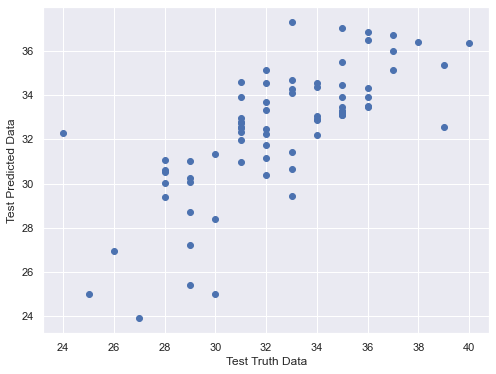

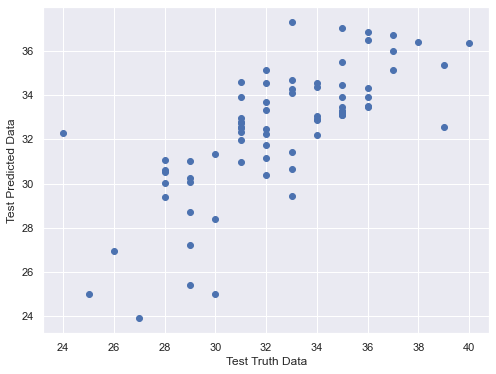

In [57]:
plt.scatter(y_test,reg_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [58]:
## residuals
residuals=y_test-reg_pred
residuals

,Temperature
24,-1.954203
6,-1.290141
153,-1.089148
211,1.923961
198,3.629708
...,...
165,1.891645
154,1.067604
216,-3.044190
79,1.712406


,Temperature
24,-1.954203
6,-1.290141
153,-1.089148
211,1.923961
198,3.629708
...,...
165,1.891645
154,1.067604
216,-3.044190
79,1.712406


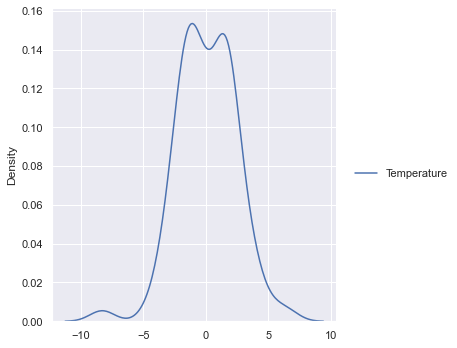

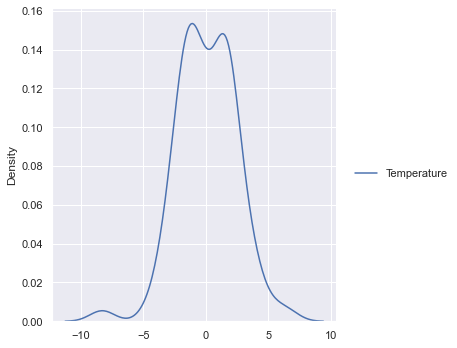

In [59]:
sns.displot(residuals,kind="kde")

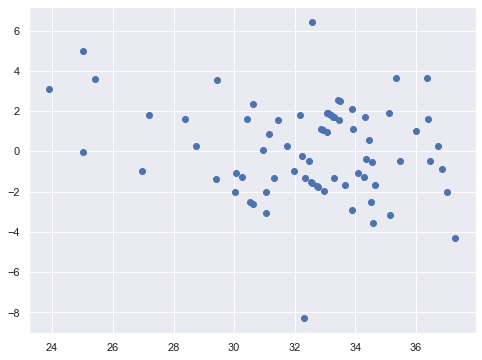

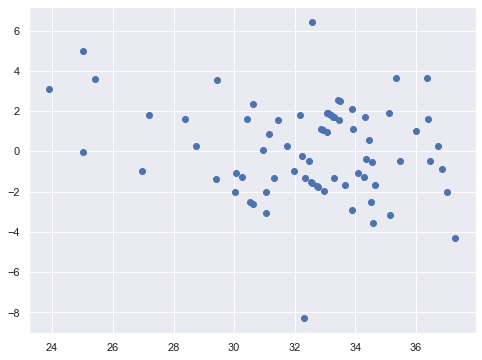

In [60]:
## SCatter plot with predictions and residual
##uniform distribution
plt.scatter(reg_pred,residuals)

In [61]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

5.399026803390441
1.8698644931587507
2.323580599718986
5.399026803390441
1.8698644931587507
2.323580599718986


R square and adjusted R square

In [62]:
## computing R Square 
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print (score)

0.5058074254013196
0.5058074254013196


In [63]:
##  Adjusted R Square
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.42736415959200524

0.42736415959200524

In [64]:
## Ridge Regression

In [65]:
## importing Ridge

from sklearn.linear_model import Ridge

# name of object:ridge
ridge=Ridge()

In [66]:
# training the data
ridge.fit(X_train,y_train)

Ridge()

Ridge()

In [67]:
## printing  the intercept
print(ridge.intercept_)

[32.01764706]
[32.01764706]


In [68]:
## printing  the intercept
print(ridge.coef_)

[[-1.22964904 -0.42699403  0.07257521  1.49784038  0.45032117 -0.12382564
   0.03647033 -0.05320679  0.02208387  0.07834668]]
[[-1.22964904 -0.42699403  0.07257521  1.49784038  0.45032117 -0.12382564
   0.03647033 -0.05320679  0.02208387  0.07834668]]


In [69]:
## Prediction from the test data
rid_pred=ridge.predict(X_test)
print(rid_pred)

[[32.96594301]
 [34.27760029]
 [34.09887376]
 [33.15017241]
 [36.36103206]
 [32.55878997]
 [35.31297988]
 [27.26774768]
 [30.61272037]
 [29.44175724]
 [29.3602389 ]
 [32.9071603 ]
 [33.85475213]
 [33.25605825]
 [34.331367  ]
 [32.18749692]
 [36.72047809]
 [25.4691386 ]
 [32.2221127 ]
 [33.67803059]
 [30.60561354]
 [28.39837179]
 [35.13255742]
 [28.72127881]
 [36.39600912]
 [26.98161277]
 [32.76728104]
 [33.10377909]
 [33.06906795]
 [34.52720586]
 [34.57004451]
 [31.32968675]
 [32.53002877]
 [33.46827969]
 [32.69942415]
 [33.25030293]
 [30.04729335]
 [34.45219132]
 [31.43005747]
 [23.95630079]
 [33.51390878]
 [33.9137668 ]
 [32.49638613]
 [25.08092308]
 [35.9834226 ]
 [32.46009189]
 [31.14624549]
 [30.37823162]
 [35.44763262]
 [34.54711393]
 [37.26820964]
 [31.01654853]
 [30.95478867]
 [34.3902163 ]
 [33.4612777 ]
 [32.33565024]
 [36.85663088]
 [32.28005774]
 [30.02179552]
 [36.45804348]
 [33.07514651]
 [30.23297967]
 [33.86160828]
 [31.98749557]
 [31.73700814]
 [25.04083537]
 [33.18964

Text(0, 0.5, 'Test Predicted Data')

Text(0, 0.5, 'Test Predicted Data')

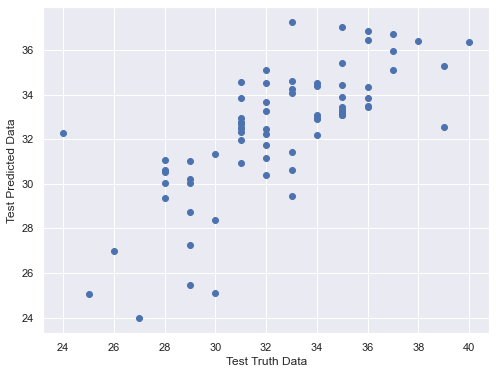

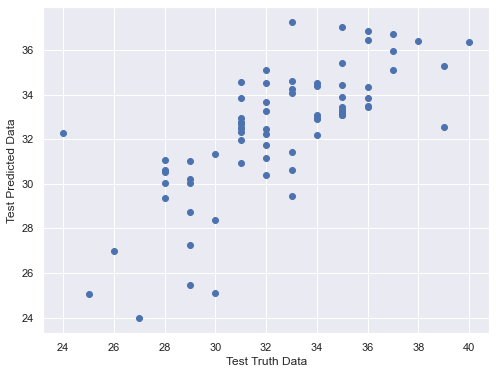

In [70]:
plt.scatter(y_test,rid_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [71]:
## residuals
residuals=y_test-rid_pred
residuals

,Temperature
24,-1.965943
6,-1.277600
153,-1.098874
211,1.849828
198,3.638968
...,...
165,1.881595
154,1.060917
216,-3.065055
79,1.688068


,Temperature
24,-1.965943
6,-1.277600
153,-1.098874
211,1.849828
198,3.638968
...,...
165,1.881595
154,1.060917
216,-3.065055
79,1.688068


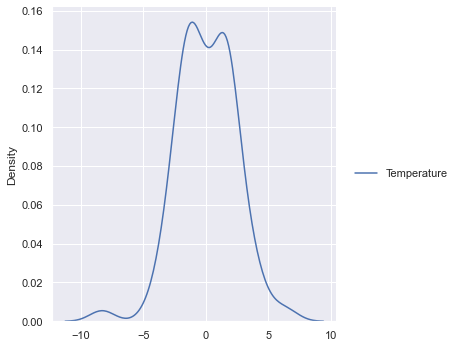

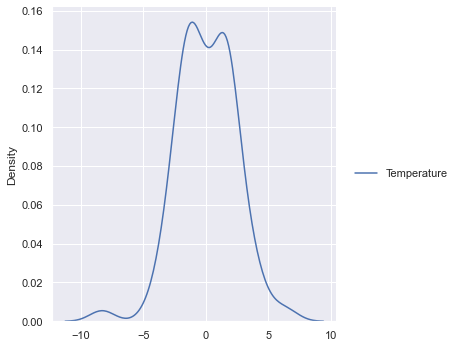

In [72]:
sns.displot(residuals,kind="kde")

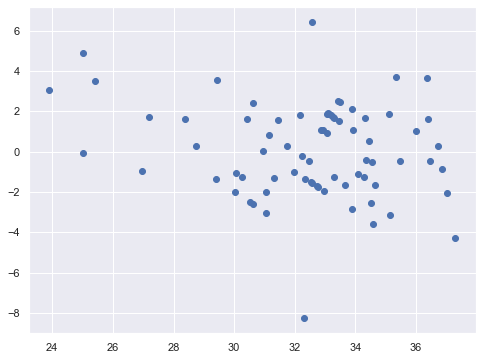

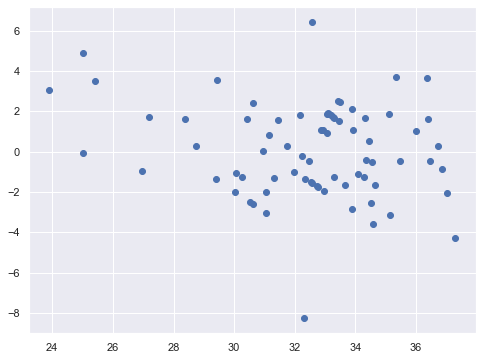

In [73]:
## SCatter plot with predictions and residual
##uniform distribution
plt.scatter(reg_pred,residuals)

 computing Mean Squared Error,Mean Absolute Error ,Root Mean Squared Error

In [74]:
# importing mean_squared_error, mean_absolute_error

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

##  printing Mean Squared Error
print(mean_squared_error(y_test, rid_pred))

##  printing Mean Absolute Error
print(mean_absolute_error(y_test, rid_pred))

##  printing Root Mean Squared Error
print(np.sqrt(mean_squared_error(y_test, rid_pred)))

## observation: It has less mean_absolute_error

5.358845128793324
1.8616932106993989
2.3149179529290715
5.358845128793324
1.8616932106993989
2.3149179529290715


R square and adjusted R square

In [75]:
## computing R Square 
from sklearn.metrics import r2_score
score=r2_score(y_test,rid_pred)
print (score)

0.5094854003297578
0.5094854003297578


In [76]:
##  Adjusted R Square
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.43162594006463995

0.43162594006463995

Lasso 

In [78]:
## importing Lasso

from sklearn.linear_model import Lasso

# name of object:lasso
lasso=Lasso()

# training the data
lasso.fit(X_train,y_train)

## printing  the intercept
print(lasso.intercept_)

[32.01764706]
[32.01764706]


In [79]:
## Prediction from the test data
lasso_pred=ridge.predict(X_test)
print(lasso_pred)

[[32.96594301]
 [34.27760029]
 [34.09887376]
 [33.15017241]
 [36.36103206]
 [32.55878997]
 [35.31297988]
 [27.26774768]
 [30.61272037]
 [29.44175724]
 [29.3602389 ]
 [32.9071603 ]
 [33.85475213]
 [33.25605825]
 [34.331367  ]
 [32.18749692]
 [36.72047809]
 [25.4691386 ]
 [32.2221127 ]
 [33.67803059]
 [30.60561354]
 [28.39837179]
 [35.13255742]
 [28.72127881]
 [36.39600912]
 [26.98161277]
 [32.76728104]
 [33.10377909]
 [33.06906795]
 [34.52720586]
 [34.57004451]
 [31.32968675]
 [32.53002877]
 [33.46827969]
 [32.69942415]
 [33.25030293]
 [30.04729335]
 [34.45219132]
 [31.43005747]
 [23.95630079]
 [33.51390878]
 [33.9137668 ]
 [32.49638613]
 [25.08092308]
 [35.9834226 ]
 [32.46009189]
 [31.14624549]
 [30.37823162]
 [35.44763262]
 [34.54711393]
 [37.26820964]
 [31.01654853]
 [30.95478867]
 [34.3902163 ]
 [33.4612777 ]
 [32.33565024]
 [36.85663088]
 [32.28005774]
 [30.02179552]
 [36.45804348]
 [33.07514651]
 [30.23297967]
 [33.86160828]
 [31.98749557]
 [31.73700814]
 [25.04083537]
 [33.18964

Text(0, 0.5, 'Test Predicted Data')

Text(0, 0.5, 'Test Predicted Data')

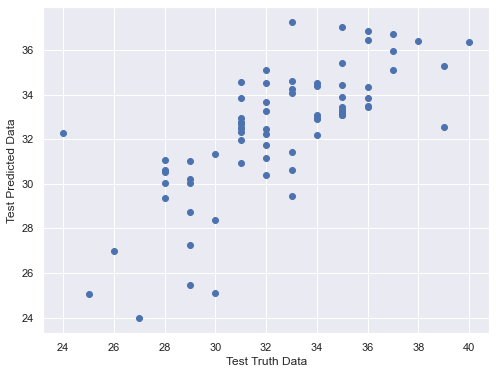

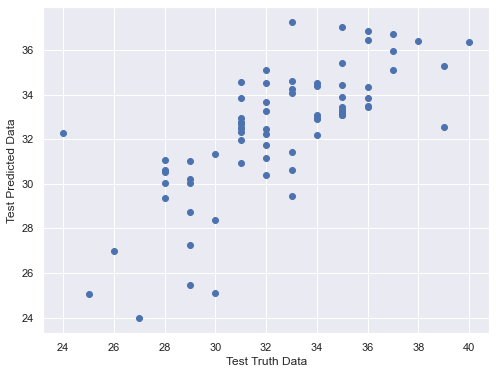

In [80]:
plt.scatter(y_test,lasso_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [81]:
## residuals
residuals=y_test-lasso_pred
residuals

,Temperature
24,-1.965943
6,-1.277600
153,-1.098874
211,1.849828
198,3.638968
...,...
165,1.881595
154,1.060917
216,-3.065055
79,1.688068


,Temperature
24,-1.965943
6,-1.277600
153,-1.098874
211,1.849828
198,3.638968
...,...
165,1.881595
154,1.060917
216,-3.065055
79,1.688068


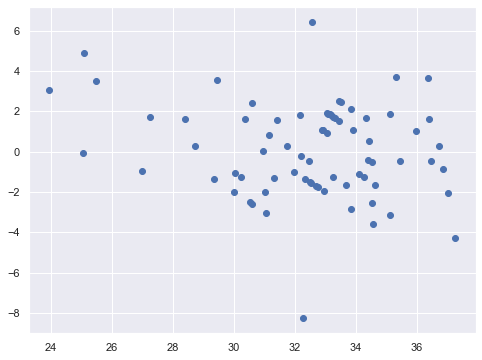

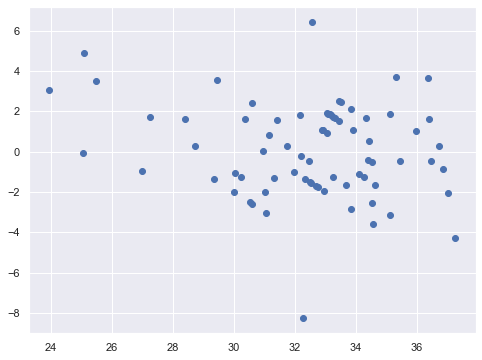

In [82]:
## SCatter plot with predictions and residual
##uniform distribution
plt.scatter(lasso_pred,residuals)

In [83]:
# importing mean_squared_error, mean_absolute_error

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

##  printing Mean Squared Error
print(mean_squared_error(y_test, lasso_pred))

##  printing Mean Absolute Error
print(mean_absolute_error(y_test, lasso_pred))

##  printing Root Mean Squared Error
print(np.sqrt(mean_squared_error(y_test, lasso_pred)))

## observation: It has less mean_absolute_error

5.358845128793324
1.8616932106993989
2.3149179529290715
5.358845128793324
1.8616932106993989
2.3149179529290715


In [84]:
## computing R Square 
from sklearn.metrics import r2_score
score=r2_score(y_test,lasso_pred)
print (score)

0.5094854003297578
0.5094854003297578


In [85]:
##  Adjusted R Square
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.43162594006463995

0.43162594006463995

ElasticNet Regression

In [86]:
## importing ElasticNet

from sklearn.linear_model import ElasticNet

# name of object:ridge
elasticnet=ElasticNet()

In [87]:
# training the data
elasticnet.fit(X_train,y_train)

## printing  the intercept
print(elasticnet.intercept_)

[32.01764706]
[32.01764706]


In [88]:
## Prediction from the test data
elasticnet_pred=elasticnet.predict(X_test)
print(elasticnet_pred)

[32.67213636 33.269873   33.4075714  32.66853959 34.61030386 31.62397237
 34.1416227  28.98530814 30.75434219 30.0793674  30.45661795 32.40753082
 32.53450125 32.17016932 33.77094925 32.22843439 35.52925625 27.81774217
 32.07354045 32.92083515 31.04577901 29.6404581  33.68423986 30.11878613
 35.31209839 28.85180971 32.35611527 32.75252147 32.72113783 34.11074303
 33.32074761 31.21807975 32.62138623 32.98035471 32.16839337 32.46979193
 30.86022403 33.31161315 31.05283108 27.99810812 32.80611314 32.78146115
 32.33990861 27.77484704 34.63612203 32.37660863 31.67537213 30.76804076
 34.26167555 33.60235971 35.5901428  31.25648829 31.54113225 33.51867115
 33.52645079 32.26931156 36.01225597 32.06989197 30.87812302 34.84168596
 33.08258724 30.83832455 33.40603929 31.88645467 31.84557868 27.96455871
 32.98736026 31.30796986 35.32680494 34.45693935 32.6886952  31.43615565
 33.19757725 33.69272134]
[32.67213636 33.269873   33.4075714  32.66853959 34.61030386 31.62397237
 34.1416227  28.98530814 

Text(0, 0.5, 'Test Predicted Data')

Text(0, 0.5, 'Test Predicted Data')

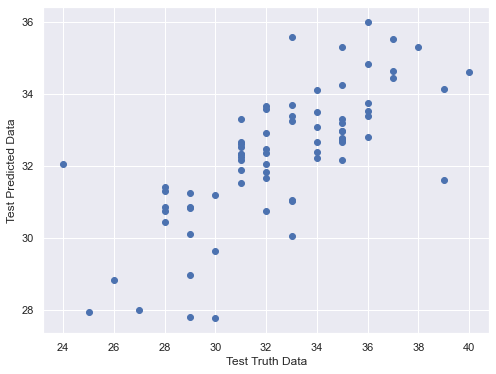

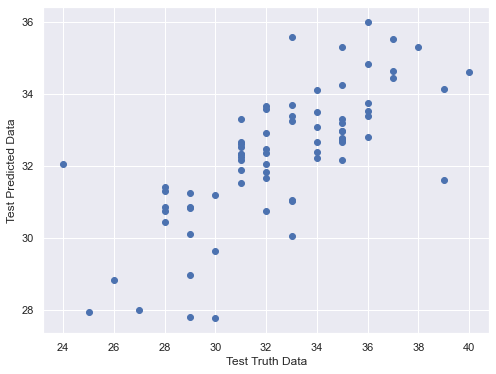

In [89]:
plt.scatter(y_test,elasticnet_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

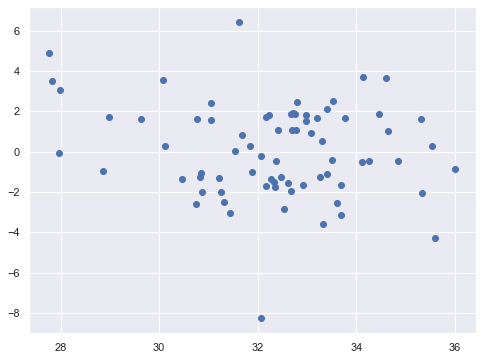

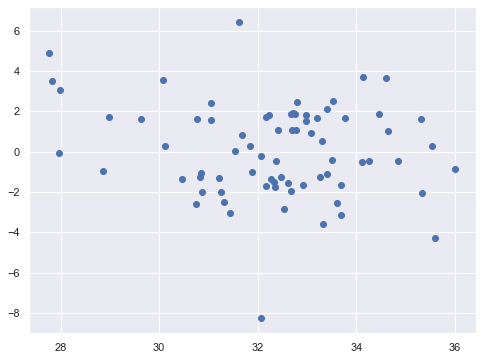

In [91]:
## SCatter plot with predictions and residual
##uniform distribution
plt.scatter(elasticnet_pred,residuals)

In [92]:
# importing mean_squared_error, mean_absolute_error

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

##  printing Mean Squared Error
print(mean_squared_error(y_test, elasticnet_pred))

##  printing Mean Absolute Error
print(mean_absolute_error(y_test, elasticnet_pred))

##  printing Root Mean Squared Error
print(np.sqrt(mean_squared_error(y_test, elasticnet_pred)))

## observation: It has less mean_absolute_error

5.558939937443493
1.866916869714118
2.357740430463772
5.558939937443493
1.866916869714118
2.357740430463772


In [93]:
## computing R Square 
from sklearn.metrics import r2_score
score=r2_score(y_test,elasticnet_pred)
print (score)

0.49116999419238505
0.49116999419238505


In [94]:
##  Adjusted R Square
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.4104033266038748

0.4104033266038748